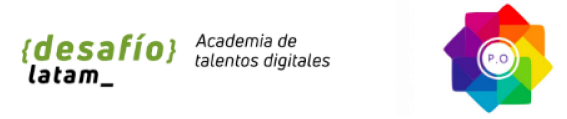

<h1><center>Proyecto Oráculo - Documentación Técnica</center></h1>

## Integrantes: 
- Eduardo Callejas
- Alvaro Fuentes
- Carlos Ochoa

Este documento contiene un completo detalle del análisis de datos para cada dataset, preprocesamiento de estos, análisis de exploratorio, modelos predictivos y análisis de resultados.

## Contenido

__1- Analisis de datos__
- 1.1.- Dataset “Compras”
- 1.2.- Dataset “Productos”
- 1.3.- Dataset “Recolector”
- 1.4.- Dataset “Tiendas”
- 1.5.- Dataset de Consolidación
    - 1.5.1.- Dataset con datos sin imputar
    - 1.5.2.- Dataset con datos imputados 

__2.- Análisis exploratorio__
- 2.1.- Distancia v/s tiempo de entrega
- 2.2.- Cantidad de productos v/s tiempo de entrega
    - 2.2.1.- Distribución de productos por orden
    - 2.2.2.- Relación con el tiempo de entrega
- 2.3.- Calificación del repartidor v/s tiempo de entrega
- 2.4.- Hora/día de la semana v/s tiempo de entrega
    - 2.4.1.- Atributo “Hora”
    - 2.4.2.- Atributo “Día de la semana”
    - 2.4.3.- Día y fecha

__3.- Modelos predictivos__
- 3.1.-  Modelamiento con dataset sin imputar y atributo “id_entrega” sin segmentar.
	- 3.1.1.- Pre procesamiento previo
	- 3.1.2.- Modelos lineales
		- 3.1.2.1.- Matriz de correlación
		- 3.1.2.2.- Normalización de variables
		- 3.1.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.1.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.1.3.- Modelos de ensamble
		- 3.1.3.1.- Conjuntos de entrenamiento y validación (sin normalizar)
		- 3.1.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos
- 3.2.-  Modelamiento con dataset imputado y atributo “id_entrega” sin segmentar.
	- 3.2.1.- Pre procesamiento previo
	- 3.2.2.- Modelos lineales
		- 3.2.2.1.- Matriz de correlación
		- 3.2.2.2.- Normalización de variables
		- 3.2.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.2.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.2.3.- Modelos de ensamble
		- 3.2.3.1.- Conjuntos de entrenamiento y validación (sin normalizar)
		- 3.2.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos

- 3.3.-  Modelamiento con dataset sin imputar y atributo “id_entrega” = 1
	- 3.3.1.- Pre procesamiento previo
	- 3.3.2.- Modelos lineales
		- 3.3.2.1.- Matriz de correlación
		- 3.3.2.2.- Normalización de variables
		- 3.3.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.3.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.3.3.- Modelos de ensamble
		- 3.3.3.1.- Conjuntos de entrenamiento y validación (sin normalizar)
		- 3.3.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos
- 3.4.-  Modelamiento con dataset sin imputar y atributo “id_entrega” = 0
	- 3.4.1.- Pre procesamiento previo
	- 3.4.2.- Modelos lineales
		- 3.4.2.1.- Matriz de correlación
		- 3.4.2.2.- Normalización de variables
		- 3.4.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.4.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.4.3.- Modelos de ensamble
		- 3.4.3.1.- Conjuntos de entrenamiento y validación (sin normalizar)
		- 3.4.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos

- 3.5.-  Modelamiento con dataset imputado y atributo “id_entrega” = 1
	- 3.5.1.- Pre procesamiento previo
	- 3.5.2.- Modelos lineales
		- 3.5.2.1.- Matriz de correlación
		- 3.5.2.2.- Normalización de variables
		- 3.5.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.5.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.5.3.- Modelos de ensamble
		- 3.5.3.1.- Conjuntos de entrenamiento y validacion (sin normalizar)
		- 3.5.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos
- 3.6.-  Modelamiento con dataset imputado y atributo “id_entrega” = 0
	- 3.6.1.- Pre procesamiento previo
	- 3.6.2.- Modelos lineales
		- 3.6.2.1.- Matriz de correlación
		- 3.6.2.2.- Normalización de variables
		- 3.6.2.3.- Conjuntos de entrenamiento y validación (normalizados)
		- 3.6.2.4.- Creación de modelos, refactorización y métricas de desempeño
	- 3.6.3.- Modelos de ensamble
		- 3.6.3.1.- Conjuntos de entrenamiento y validación (sin normalizar)
		- 3.6.3.2.- Creación de modelos, métricas de desempeño e importancia de atributos

## Importación de Librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from haversine import haversine, Unit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from pygam import LinearGAM
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
rs = 16356

## 1 - Analisis de datos

El set de datos inicial esta compuesto por cuatros archivos .csv. Los atributos junto con su descripción se presentan a continuación:

__Orden_compra__  
- id_orden : Identificador del pedido de compra.
- Latitud : Dirección de entrega.
- Longitud : Dirección de entrega.
- Dia : Día de la semana en que se prometió la orden
    0: domingo
    1: lunes
    2: martes
    3: miercoles
    4: jueves
    5: viernes
    6: sabado
- Promesa : Hora de entrega prometida al cliente.
- Entrega : Hora en que se entregó el pedido al cliente.
- id_entrega : Si el pedido fue solicitado en “Menos de 90 minutos” o en una ventana horario en el futuro.
- id_recolector : Identificador de la persona que recolectó el pedido.
- id_trasporte : Identificador de la persona que hizo transporte del pedido.
- id_tienda : Identificador del local en que se realizó la compra.
- Tiempo : Tiempo total que demoró completar la orden (desde la compra hasta la entrega).

__Orden_productos__  
- id_orden : Identificador del pedido de compra
- id_productos : Identificador del producto.
- cant_producto : Cantidad solicitada del producto por el cliente.
- cant_encontrada : Cantidad solicitada del producto por el cliente.
- Unidad : Formato en que se vendió el producto (Unidades o KG).

__Recolector__  
- id_recolector : Identificador recolector.
- Clasificación_recolector : Clasificación de experiencia recolector.
- P_aciertos : Porcentaje histórico de productos que el recolector encontró.
- velocidad : Velocidad histórica de recogida de productos.
- P_aceptacion : Porcentaje histórico de pedidos aceptado por el recolector.
- Score_Recolector : Evaluación del recolector.

__Tienda__  
- id_tienda : Identificador de la tienda.
- tienda : Identificador de la tienda a la cual pertenece de la tienda.
- latitud_tienda : Latitud de la ubicación de la tienda.
- Longitud_tienda : Longitud de la ubicación de la tienda.

### 1.1 - Dataset "Compras"

In [2]:
compra = pd.read_csv('data/1_Orden_compra.csv', sep=';')
compra.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


In [3]:
#Variable categorica
compra['on_demand'].value_counts()

False    4225
True     3070
Name: on_demand, dtype: int64

In [4]:
#Se recodifica el atributo Booleano
compra['on_demand'] = np.where(compra['on_demand'] == False, 1, 0)

In [5]:
compra['on_demand'].value_counts()

1    4225
0    3070
Name: on_demand, dtype: int64

In [6]:
#Se actualizan los nombres de los atributos en el dataset
compra.rename(columns={'order_id':'id_orden', 'lat':'latitud', 'lng':'longitud', 'dow':'dia', 'promised_time':'promesa',
                       'actual_time':'entrega', 'picker_id':'id_recolector', 'driver_id':'id_transporte', 
                       'store_branch_id':'id_tienda', 'total_minutes':'tiempo'}, inplace=True)

In [7]:
print("La cantidad de registros es de:", compra.shape[0])
print("La cantidad de atributos es de:", compra.shape[1])

La cantidad de registros es de: 7295
La cantidad de atributos es de: 11


In [8]:
#Se hace una tabla para observar los missing values
total = compra.isnull().sum().sort_values(ascending=False)
percent = round((compra.isnull().sum() / compra.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
tiempo,752,10.31
id_tienda,0,0.00
id_transporte,0,0.00
id_recolector,0,0.00
on_demand,0,0.00
entrega,0,0.00
promesa,0,0.00
dia,0,0.00
longitud,0,0.00
latitud,0,0.00


Se puede apreciar que en este dataset sólo el atributo `tiempo` contiene datos perdidos, con un monto de __752__ registros, los cuales representan el __10.31%__ de la data, se hará una eliminación de dichos datos, el motivo es que este atributo es nuestra variable objetivo y no queremos que se vea afectada por ninguna razón.

In [9]:
compra.dropna(inplace=True)

In [10]:
print("La cantidad de registros es de:", compra.shape[0])
print("La cantidad de atributos es de:", compra.shape[1])

La cantidad de registros es de: 6543
La cantidad de atributos es de: 11


### 1.2 - Dataset "Productos"

In [11]:
productos = pd.read_csv('data/2_Orden_productos.csv', sep=';')
productos.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


In [12]:
#Se actualiza el nombre del atributo que identifica la orden de compra
productos.rename(columns={'order_id':'id_orden'}, inplace=True)

In [13]:
print("La cantidad de registros es de:", productos.shape[0])
print("La cantidad de atributos es de:", productos.shape[1])

La cantidad de registros es de: 120876
La cantidad de atributos es de: 5


No se encontraron datos perdidos en este dataset.

In [14]:
productos.isnull().any()

id_orden          False
product_id        False
quantity          False
quantity_found    False
buy_unit          False
dtype: bool

Se procederá a separar aquellos productos que se pesan y se contabilizan como 1, los que son por unidad mantendremos la cantidad. 
El objetivo de esta segmentación es posteriormente tener una columna de productos que son pesado y otras que son por unidad, ya que para este caso sólo nos importa la cantidad total de productos (pesados y por unidad) por orden, si bien tenemos un código de producto por el momento no podremos determinar el tipo de producto, si tendríamos esa información disponible podríamos determinar que productos que son pesados pueden influenciar más o menos en el tiempo de entrega, así que, nos concentraremos en la cantidad de productos por orden.

In [15]:
#Creamos una columna de tipo bandera, para determinar que las cantidades que están en el atributo quantity,
#correspondan con su respectiva unidad
productos['cantidad_ajustada'] = np.where(productos['buy_unit'] == 'KG' , 1, productos['quantity'])
productos['cantidad_ajustada'] = pd.to_numeric(productos['cantidad_ajustada'])

Para este caso cuando se evaluó la columna de "tipo bandera"--> `cantidad_ajustada`, se pudo apreciar que teníamos 2 casos anómalos ya que acá todos los valores tenían que ser entero y descubrimos que existen 2 casos donde en la columna `quantity` hay valores decimales y en la columna `buy_unit` su valor es __UN__ representando esto como Unidad, cuando en realidad es de tipo __KG__, se prodecerá a actualizar estos registros y volver a actualizar la columna `cantidad_ajustada`.

In [16]:
no_KG = productos.loc[(productos['cantidad_ajustada'] == 0.225) | (productos['cantidad_ajustada'] == 0.090)]
no_KG.head()

,id_orden,product_id,quantity,quantity_found,buy_unit,cantidad_ajustada
29253,7a1be969ec97b66b710f7dc5b80f8a6f,068566a7b65d4093075f13ae383aa3d4,0.09,0.090,UN,0.090
96244,a5fc3ba3db31ac6a1ea5ddb87dcbc596,e0922ceeaeb05c556c27138d10305932,0.225,0.225,UN,0.225


Existen par de productos que en la __unidad de compra__ marcan como __"UN"__ cuando en realidad son de tipo __"KG"__.

In [17]:
#Se reemplazan esos valores por los verdaderos
productos.loc[29253, 'buy_unit'] = 'KG'
productos.loc[96244, 'buy_unit'] = 'KG'

In [18]:
#Se actualizan los datos
productos['cantidad_ajustada'] = np.where(productos['buy_unit'] == 'KG' , 1, productos['quantity'])
productos['cantidad_ajustada'] = pd.to_numeric(productos['cantidad_ajustada'])

Separamos en tipo de productos: Aquellos que se pesan y aquellos que no, además, crearemos una columna extra que será la cantidad total, conformada por la suma entre los productos sin pesar con los que se pesan.

In [19]:
tipo = pd.get_dummies(productos['buy_unit'])

In [20]:
productos['sin_pesar'] = tipo['UN']
productos['pesados'] = tipo ['KG']
productos['cantidad_total'] = productos['sin_pesar'] + productos['pesados']
productos.drop(columns=['quantity', 'quantity_found', 'buy_unit', 'product_id', 'cantidad_ajustada'], inplace=True)

In [21]:
productos_agrupados = productos.groupby(by='id_orden').sum().reset_index()

In [22]:
productos_agrupados.head()

,id_orden,sin_pesar,pesados,cantidad_total
0,001ef94c50c71cb0e674b6293e9b6068,30,5,35
1,001f7583bb106a338d09a12a89e54cbd,5,0,5
2,002b6dcb32fef90ebb1cb691afe6a413,9,0,9
3,002ebc46f3e40c49044aceb8311df432,3,1,4
4,002f97bd7dad0d275d8511436c18b572,7,4,11


Finalmente, se hizo una agrupación del dataframe por número de orden, así consideramos solamente los productos que son pesado y los que no son pesados y la suma total de ellos.

### 1.3 - Dataset "Recolector"

In [23]:
recolector = pd.read_csv('data/3_Recolector.csv', sep=";")
recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [24]:
print("La cantidad de registros es de:", recolector.shape[0])
print("La cantidad de atributos es de:", recolector.shape[1])

La cantidad de registros es de: 600
La cantidad de atributos es de: 6


In [25]:
#Se renombran las columnas del dataset
recolector.rename(columns={'shopper_id':'id_recolector', 'seniority':'clasificacion_recolector', 
                           'found_rate':'p_aciertos', 'picking_speed':'velocidad', 
                           'accepted_rate':'p_aceptacion', 'rating':'score_recolector'}, inplace=True)

Tenemos algunos datos perdidos en el dataset por lo que determinaremos la cantidad que representa cada atributo para posteriormente aislar estos casos y analizarlos de una mejor manera.

In [26]:
recolector.isnull().any()

id_recolector               False
clasificacion_recolector    False
p_aciertos                   True
velocidad                   False
p_aceptacion                 True
score_recolector             True
dtype: bool

Podemos apreciar que existen __3 atributos__ los cuales tienen algunos datos perdidos, donde se representa en porcentaje la cifra de ellos. No vamos a eliminarlos hasta cruzar este dataset con los otros y tener el consolidado.

In [27]:
total = recolector.isnull().sum().sort_values(ascending=False)
percent = round((recolector.isnull().sum() / recolector.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
p_aciertos,36,6.00
score_recolector,34,5.67
p_aceptacion,6,1.00
velocidad,0,0.00
clasificacion_recolector,0,0.00
id_recolector,0,0.00


Para este caso tenemos pocos atributos en nuestro dataset, por lo que emplearemos la técnica `get_dummies` para separar y convertir en nuevos atributos la columna `clasificacion_recolector`, la cual representa la clasificación del recolector y para este caso tenemos sólo __4 tipos__.

In [28]:
#Se contabilizan las categorías del atributo 'clasificacion_recolector'
recolector['clasificacion_recolector'].value_counts()

ADVANCED        268
INTERMEDIATE    204
REVIEW           99
BEGINNER         29
Name: clasificacion_recolector, dtype: int64

In [29]:
recolector['seniority_copy'] = recolector['clasificacion_recolector']
recolector = pd.get_dummies(recolector, columns=['clasificacion_recolector'], prefix='seniority', prefix_sep='_', 
                            drop_first=True)

In [30]:
recolector.head()

,id_recolector,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_copy,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW
0,087ab65ceca40dbef697f585dc159d5d,0.8610,1.64,1.00,4.48,ADVANCED,0,0,0
1,645973c41314d763b58dc2bceeeeffc9,0.8337,2.83,0.96,4.79,INTERMEDIATE,0,1,0
2,82810715fdda44962e7e422015ea1f32,0.8681,1.27,0.88,4.84,ADVANCED,0,0,0
3,416aa7dbd5a2f58d7bca96657e8faa1e,0.8784,2.11,1.00,NaN,INTERMEDIATE,0,1,0
4,27a3e845a4c3eb7ded4748f84140a843,0.8466,1.50,1.00,4.84,ADVANCED,0,0,0


In [31]:
recolector.rename(columns={'seniority_copy':'clasificacion_recolector'}, inplace=True)

### 1.4 - Dataset "Tiendas"

In [32]:
tienda = pd.read_csv('data/4_tienda.csv', sep=';')
tienda.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


Podemos apreciar que no tenemos datos perdidos en el dataset.

In [33]:
tienda.isnull().any()

store_branch_id    False
store              False
lat                False
lng                False
dtype: bool

In [34]:
print("La cantidad de registros es de:", tienda.shape[0])
print("La cantidad de atributos es de:", tienda.shape[1])

La cantidad de registros es de: 113
La cantidad de atributos es de: 4


In [35]:
#Se renombran las columnas del dataset
tienda.rename(columns={'store_branch_id':'id_tienda', 'store':'tienda', 'lat':'latitud_tienda',
                       'lng':'longitud_tienda'}, inplace=True)

### 1.5 - Dataset de Consolidación

In [36]:
#Consolidación de los df compra y prodructos
df = pd.merge(compra, productos_agrupados, how='left', on='id_orden')

In [37]:
#Consolidación del df con recolector
df = pd.merge(df, recolector, how='left', on='id_recolector')

In [38]:
#consolidación de todos los dataset
df = pd.merge(df, tienda, how='left', on='id_tienda')

In [39]:
print("La cantidad de registros final es de:", df.shape[0])
print("La cantidad de atributos final es de:", df.shape[1])

La cantidad de registros final es de: 6543
La cantidad de atributos final es de: 25


In [40]:
df.to_csv('data/consolidado.csv', header=True, index=False)

Tenemos nuestro dataset consolidado, vamos a proceder a evaluarlo para determinar si hay casos con datos perdidos y/o anómalos, posteriormente se aplicarán más técnicas de recodificación para dejar limpio en su totalidad.

In [41]:
df.head()

,id_orden,latitud,longitud,dia,promesa,entrega,on_demand,id_recolector,id_transporte,id_tienda,...,velocidad,p_aceptacion,score_recolector,clasificacion_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,tienda,latitud_tienda,longitud_tienda
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,1,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.00,4.68,ADVANCED,0,0,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,1,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,...,1.14,1.00,4.76,ADVANCED,0,0,0,387d4a5b65cf4bf00ad805c4b00eed01,18.163.960.871.027.900,-10.032.899.405.911.000
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,1,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,...,2.03,1.00,4.96,INTERMEDIATE,0,1,0,0fae7b61265bc7ca4ce4d81440b62501,1.824.565.541.228.880,-1.003.324.934.760.470
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,1,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,...,2.06,0.92,4.92,INTERMEDIATE,0,1,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,1,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,...,1.89,1.00,4.92,ADVANCED,0,0,0,452ae015bf846e1d2932b7ea15720d64,1.823.159.108.764.060,-10.031.450.001.698.800


Existen datos perdidos en el dataset consolidado,vamos a calcular la cantidad en cada atributo, se mostrarán dichos datos en una tabla.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 6542
Data columns (total 25 columns):
id_orden                    6543 non-null object
latitud                     6543 non-null object
longitud                    6543 non-null object
dia                         6543 non-null int64
promesa                     6543 non-null object
entrega                     6543 non-null object
on_demand                   6543 non-null int32
id_recolector               6543 non-null object
id_transporte               6543 non-null object
id_tienda                   6543 non-null object
tiempo                      6543 non-null object
sin_pesar                   6528 non-null float64
pesados                     6528 non-null float64
cantidad_total              6528 non-null float64
p_aciertos                  6468 non-null float64
velocidad                   6543 non-null float64
p_aceptacion                6538 non-null float64
score_recolector            6473 non-null float64
clasif

Antes de pasar a realizar nuestro análisis exploratorio y posteriormente el descriptivo, terminaremos de recodificar ciertas variables en nuestro dataset para así asegurar la legibilidad de los datos al momento de implementar el modelamiento de ellos. En esta ocasión nuestro dataset consolidado está constituido por __latitudes y longitudes__ tanto de los pedidos como de las tiendas, acá vamos a trabajar con la distancia que se genera entre ellos, aplicando una transformación con la librería `haversine`, el resultado nos dará automáticamente en __Kilometros__ ya que viene por defecto en dicha librería.

In [43]:
#Se crea un dataframe temporal para calcular la distancia
distancias = pd.DataFrame()

distancias['latitud_x'] = pd.to_numeric(df['latitud'].str.replace('.',''))*100/(10**(df['latitud'].str.replace('.','').apply(len)))
distancias['longitud_x'] = (pd.to_numeric(df['longitud'].str.replace('.',''))/(10**(df['longitud'].str.replace('.','').apply(len)))) * 1000

distancias['latitud_y'] = pd.to_numeric(df['latitud_tienda'].str.replace('.',''))*100/(10**(df['latitud_tienda'].str.replace('.','').apply(len)))
distancias['longitud_y'] = (pd.to_numeric(df['longitud_tienda'].str.replace('.',''))/(10**(df['longitud_tienda'].str.replace('.','').apply(len)))) * 1000

df['distancia']= distancias.apply(lambda x: haversine((x['latitud_x'], x['longitud_x']),(x['latitud_y'], x['longitud_y'])), axis=1)

Aislamos los datos que tienen un tiempo menor a 25 minutos, para mantener una distribución normal en los datos, esto con el objetivo de hacer una comparación en los resultados que tanto puede afectar las ordenes de compra con dicho tiempo. Estos datos con esta característica en particular son de una cantidad de __657 registros__.

In [44]:
#Extendemos la vista de las columnas o atributos del dataframe
pd.set_option('display.max_columns', 100)

In [45]:
#Convertimos la variable tiempo a minutos
df['tiempo'] = pd.to_numeric(df.tiempo.str.replace('.',''))/1000000

In [46]:
#Creamos un dataframe con el tiempo menor a 25 minutos para tener una distribución casi normal y 
#modelar sin ellos para posteriormente realizar un análisis
p_anomalos = df[df['tiempo'] < 25]

In [47]:
p_anomalos.head()

,id_orden,latitud,longitud,dia,promesa,entrega,on_demand,id_recolector,id_transporte,id_tienda,tiempo,sin_pesar,pesados,cantidad_total,p_aciertos,velocidad,p_aceptacion,score_recolector,clasificacion_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,tienda,latitud_tienda,longitud_tienda,distancia
8,c1800bdd3c666b497b39d6e526917167,18.220.946.960.795.100,-10.041.727.333.923.400,2,10:00:00,8:46:04,1,a083ea904c55052cdb58917ed790ca96,a083ea904c55052cdb58917ed790ca96,2d69acabaafd2516eeffd3c69b3c1328,0.665212,19.0,1.0,20.0,0.8556,1.50,0.96,4.72,ADVANCED,0,0,0,60e4c4e1c1a8bc79123738227b9d0b08,18.218.347.218.797.100,-10.041.579.255.293.500,0.289501
12,df5de78cdde5a1fcd3ab2e1854a4b7a0,1.826.850.386.845.330,-10.031.256.569.770.200,2,12:00:00,11:36:23,1,91b508d81eb559e384062d1c046594b9,91b508d81eb559e384062d1c046594b9,8d891dfc0e29d744c15c18adced74a68,1.533419,17.0,3.0,20.0,0.8652,2.43,1.00,5.00,INTERMEDIATE,0,1,0,0fae7b61265bc7ca4ce4d81440b62501,1.824.565.541.228.880,-1.003.324.934.760.470,2.549336
27,605db8da3965581ea0bf6d56082600bf,18.245.512.889.554.400,-10.040.992.084.939.800,2,10:00:00,8:41:50,1,b7e1166967f3ad4aa76d6090cf099f80,b7e1166967f3ad4aa76d6090cf099f80,afab9a94cf9d3d20ba7192204d5e48b3,5.329401,9.0,0.0,9.0,0.8519,1.69,1.00,4.92,ADVANCED,0,0,0,60e4c4e1c1a8bc79123738227b9d0b08,1.826.087.441.600.350,-1.004.115.704.253.060,1.708215
28,e1d9a4f57ffe610c5fb453a0ab350ea0,18.245.506.201.052.900,-10.041.015.840.731.400,2,10:00:00,8:44:07,1,056c7cc586dece322e35970ee60234da,056c7cc586dece322e35970ee60234da,7a44728dc60bafc53140a9f5ef7e4e75,4.281824,1.0,0.0,1.0,0.8272,2.07,1.00,4.88,INTERMEDIATE,0,1,0,451eb58b96f0a36f31d2beebd1c9a7a8,18.265.531.115.122.400,-10.041.410.817.239.000,2.227063
52,b145ee8b457318dc87e334379e9e61f7,1.822.428.085.969.520,-10.041.237.791.251.600,2,11:00:00,10:51:25,1,8b59adedc5c1ea8defcc5e970fae8322,8b59adedc5c1ea8defcc5e970fae8322,3dd9ae393aa5327edfb27388758436bd,9.662399,4.0,0.0,4.0,0.8471,1.50,1.00,4.64,ADVANCED,0,0,0,0fae7b61265bc7ca4ce4d81440b62501,1.826.223.164.590.900,-1.004.150.072.862.420,4.220032


Tenemos un total de 657 registros que tienen tiempo menor igual a 25 minutos, procederemos a eliminarlos.

In [48]:
print("La cantidad de registros es de:", p_anomalos.shape[0])
print("La cantidad de atributos es de:", p_anomalos.shape[1])

La cantidad de registros es de: 657
La cantidad de atributos es de: 26


In [49]:
#Se hace una copia del dataframe primero, debido a que este nuevo dataframe se harán las imputaciones de
#atributos y evaluarlo en nuestros modelos posteriormente también.
df_imputados = df.copy()

In [50]:
#Se eliminan los registros con un tiempo menor a 25 minutos
df.drop( df[ df['tiempo'] < 25 ].index , inplace=True)

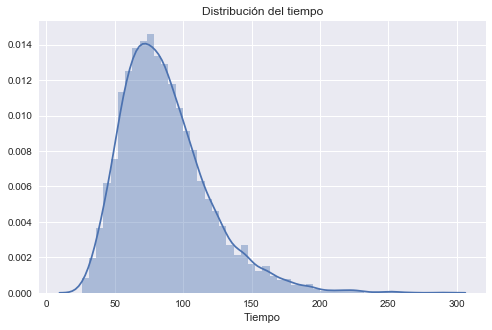

In [51]:
plt.figure(figsize=(8, 5))
sns.distplot(df['tiempo'])
plt.xlabel("Tiempo")
plt.title("Distribución del tiempo");

Acá podremos observar la cantidad de datos perdidos por atributo y cuanto significa cada uno de ellos en porcentaje; tenemos 6 atributos con datos perdidos, para este caso vamos a imputar 3 de ellos `p_aciertos, score_recolector y p_aceptacion`, la imputación se hará rellenando los valores perdidos con la media de la columna, para efecto en el modelamiento no tendrá ninguno ya que los valores de los registros están concentrados en esa área y no afectaría de manera relevante, además, salvaríamos esos datos para obtener un mejor resultado. A continuación, se detalla el proceso de cada variable:

In [52]:
total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum() / df.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
p_aciertos,66,1.12
score_recolector,63,1.07
pesados,13,0.22
cantidad_total,13,0.22
sin_pesar,13,0.22
p_aceptacion,5,0.08
id_tienda,0,0.00
latitud,0,0.00
longitud,0,0.00
dia,0,0.00


In [53]:
#Eliminación de los datos perdidos para trabajar con el dataset sin imputar
df.dropna(inplace=True)

In [54]:
df.isnull().any()

id_orden                    False
latitud                     False
longitud                    False
dia                         False
promesa                     False
entrega                     False
on_demand                   False
id_recolector               False
id_transporte               False
id_tienda                   False
tiempo                      False
sin_pesar                   False
pesados                     False
cantidad_total              False
p_aciertos                  False
velocidad                   False
p_aceptacion                False
score_recolector            False
clasificacion_recolector    False
seniority_BEGINNER          False
seniority_INTERMEDIATE      False
seniority_REVIEW            False
tienda                      False
latitud_tienda              False
longitud_tienda             False
distancia                   False
dtype: bool

In [55]:
#Eliminamos las columnas sin relevancia
df.drop(columns=['id_orden', 'latitud', 'longitud', 'id_recolector', 'id_transporte', 
                 'id_tienda', 'tienda', 'latitud_tienda', 'longitud_tienda', 'clasificacion_recolector'], 
        inplace=True)

### 1.5.1 - Creación de dataset sin imputaciones

In [56]:
#Dataset modelamiento sin imputaciones
df_sin_imputaciones = df.copy()

#Dejar atributo día mientras tanto para posterior análisis exploratorio
df_sin_imputaciones['dia_copy'] = df_sin_imputaciones['dia']

#one-hot-enconding al atributo dia
df_sin_imputaciones = pd.get_dummies(df_sin_imputaciones, prefix='dia', prefix_sep='_', columns=['dia'], 
                                     drop_first=True)

#Se renombran ciertas columnas del dataframe
df_sin_imputaciones.rename(columns={'dia_copy':'dia', 'dia_1':'lunes', 'dia_2':'martes', 'dia_3':'miercoles',
                                 'dia_4':'jueves', 'dia_5':'viernes', 'dia_6':'sabado'}, inplace=True)


df_sin_imputaciones.head()

,promesa,entrega,on_demand,tiempo,sin_pesar,pesados,cantidad_total,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,dia,lunes,martes,miercoles,jueves,viernes,sabado
0,13:00:00,12:00:15,1,91.800861,17.0,10.0,27.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478,2,0,1,0,0,0,0
1,13:00:00,10:28:10,1,206.599732,88.0,15.0,103.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546,2,0,1,0,0,0,0
2,11:00:00,10:40:50,1,93.458001,6.0,0.0,6.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018,2,0,1,0,0,0,0
3,10:00:00,9:41:47,1,124.778761,12.0,5.0,17.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097,2,0,1,0,0,0,0
4,11:00:00,10:07:53,1,130.321208,28.0,16.0,44.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042,2,0,1,0,0,0,0


### 1.5.2 - Creación de dataset con imputaciones

In [57]:
df_imputados.head()

,id_orden,latitud,longitud,dia,promesa,entrega,on_demand,id_recolector,id_transporte,id_tienda,tiempo,sin_pesar,pesados,cantidad_total,p_aciertos,velocidad,p_aceptacion,score_recolector,clasificacion_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,tienda,latitud_tienda,longitud_tienda,distancia
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,1,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,17.0,10.0,27.0,0.8564,1.56,1.00,4.68,ADVANCED,0,0,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,1.201478
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,1,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,88.0,15.0,103.0,0.8516,1.14,1.00,4.76,ADVANCED,0,0,0,387d4a5b65cf4bf00ad805c4b00eed01,18.163.960.871.027.900,-10.032.899.405.911.000,1.557546
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,1,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,6.0,0.0,6.0,0.8337,2.03,1.00,4.96,INTERMEDIATE,0,1,0,0fae7b61265bc7ca4ce4d81440b62501,1.824.565.541.228.880,-1.003.324.934.760.470,2.360018
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,1,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,12.0,5.0,17.0,0.8571,2.06,0.92,4.92,INTERMEDIATE,0,1,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,1.899097
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,1,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,28.0,16.0,44.0,0.8625,1.89,1.00,4.92,ADVANCED,0,0,0,452ae015bf846e1d2932b7ea15720d64,1.823.159.108.764.060,-10.031.450.001.698.800,0.289042


Tenemos datos perdidos en nuestro dataset, vamos a imputar ciertas variables para no eliminar registros, posteriormente haremos nuestra modelación y compararemos.

In [58]:
total = df_imputados.isnull().sum().sort_values(ascending=False)
percent = round((df_imputados.isnull().sum() / df_imputados.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
p_aciertos,75,1.15
score_recolector,70,1.07
pesados,15,0.23
cantidad_total,15,0.23
sin_pesar,15,0.23
p_aceptacion,5,0.08
id_tienda,0,0.00
latitud,0,0.00
longitud,0,0.00
dia,0,0.00


#### Imputación de los atributos

Imputaremos los datos perdidos de los siguientes atributos: `p_aciertos, p_aceptacion, score_recolector, pesados y sin_pesar` por la media del atributo con respecto a la categoría de `clasificacion_recolector`.

In [59]:
#Aislamos los datos nulos del atributo
p_aciertos = df_imputados[df_imputados['p_aciertos'].isnull()]

In [60]:
#Verificamos cuales son las categorías del atributo de la clasificación del recolector
#para luego hacer la imputación a ellos
p_aciertos.clasificacion_recolector.value_counts()

BEGINNER        53
REVIEW          18
INTERMEDIATE     4
Name: clasificacion_recolector, dtype: int64

In [61]:
#Obtenemos la media de p_aciertos por categoría del recolector
media_cr = df_imputados.groupby('clasificacion_recolector')['p_aciertos'].mean()
media_cr

clasificacion_recolector
ADVANCED        0.863677
BEGINNER        0.836530
INTERMEDIATE    0.849510
REVIEW          0.828049
Name: p_aciertos, dtype: float64

In [62]:
#Hacemos la imputación de los datos perdidos de p_aciertos con la media del atributo con respecto 
#a la categoría 

df_imputados['p_aciertos'] = np.where((df_imputados['clasificacion_recolector'] == 'BEGINNER') & 
                                      (df_imputados['p_aciertos'].isnull()), 0.836530, df_imputados['p_aciertos'])

df_imputados['p_aciertos'] = np.where((df_imputados['clasificacion_recolector'] == 'REVIEW') & 
                                      (df_imputados['p_aciertos'].isnull()), 0.828049, df_imputados['p_aciertos'])

df_imputados['p_aciertos'] = np.where((df_imputados['clasificacion_recolector'] == 'INTERMEDIATE') & 
                                      (df_imputados['p_aciertos'].isnull()), 0.849510, df_imputados['p_aciertos'])

In [63]:
#Aislamos los casos de p_aceptacion
p_aceptacion = df_imputados[df_imputados['p_aceptacion'].isnull()]
p_aceptacion.head()

,id_orden,latitud,longitud,dia,promesa,entrega,on_demand,id_recolector,id_transporte,id_tienda,tiempo,sin_pesar,pesados,cantidad_total,p_aciertos,velocidad,p_aceptacion,score_recolector,clasificacion_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,tienda,latitud_tienda,longitud_tienda,distancia
532,fdd5ba893f325dd8f21a14717261ff4c,18.177.901.456.272.600,-10.036.665.946.228.000,2,20:00:00,19:39:23,1,22d1884f71a7cd382d9972186548c687,22d1884f71a7cd382d9972186548c687,ea19343a1b5262c624347d89cc17aa9e,111.746763,10.0,3.0,13.0,0.836530,2.37,NaN,NaN,BEGINNER,1,0,0,60e4c4e1c1a8bc79123738227b9d0b08,18.157.752.795.391.800,-10.035.393.427.395.500,2.244462
1316,0408b5c9581c53336debb7f8daba9a5c,1.828.493.651.748.040,-10.035.820.137.817.700,4,13:00:00,12:21:33,1,f92b63427b71a539d368d266d121e06e,f92b63427b71a539d368d266d121e06e,258f4c26a82a5239920a082ffe23cfc4,81.959728,4.0,0.0,4.0,0.836530,2.37,NaN,NaN,BEGINNER,1,0,0,e27789d5e619b255663b2bfa68b5851f,18.298.407.008.064.500,-1.003.417.427.666.350,1.507898
1507,1011b1e06bb67a235289e62493d6e10c,18.300.366.845.024.200,-10.034.120.474.302.500,4,14:18:00,14:28:17,0,f92b63427b71a539d368d266d121e06e,f92b63427b71a539d368d266d121e06e,86e6e48d0cb57f794b0c48162409fa74,99.426557,8.0,1.0,9.0,0.836530,2.37,NaN,NaN,BEGINNER,1,0,0,60e4c4e1c1a8bc79123738227b9d0b08,18.299.885.413.279.500,-10.034.848.650.909.700,0.093677
2132,ba07ccb17ecfecc3704bf4a8eaaabdfc,1.828.350.784.657.940,-10.035.750.338.803.800,5,13:41:00,14:31:10,0,976dab4af89ac6584b335192e1cb4ad1,976dab4af89ac6584b335192e1cb4ad1,9d65282d498c0338377867996e761399,138.597911,17.0,1.0,18.0,0.836530,2.37,NaN,NaN,BEGINNER,1,0,0,452ae015bf846e1d2932b7ea15720d64,1.829.395.022.781.570,-10.035.116.440.086.400,1.163069
5199,ef75a716763bd53f12dfba07447c52e6,18.288.544.898.218.600,-10.030.847.100.424.900,2,20:00:00,19:37:08,1,cacf984f9adc27a9abe9c642713e1064,cacf984f9adc27a9abe9c642713e1064,4f01884af565f4d2df35419e09cf58d0,115.622551,3.0,1.0,4.0,0.828049,2.37,NaN,NaN,REVIEW,0,0,1,0fae7b61265bc7ca4ce4d81440b62501,18.300.290.799.329.400,-10.034.753.283.029.000,1.369646


In [64]:
#Verificamos cuales son los datos perdidos con respecto al atributo de
#clasificación del recolector
p_aceptacion.clasificacion_recolector.value_counts()

BEGINNER    4
REVIEW      1
Name: clasificacion_recolector, dtype: int64

In [65]:
#Obtenemos la media del atributo con respecto a la clasificación del recolector
media_cr = df_imputados.groupby('clasificacion_recolector')['p_aceptacion'].mean()
media_cr

clasificacion_recolector
ADVANCED        0.972896
BEGINNER        0.906551
INTERMEDIATE    0.969937
REVIEW          0.874873
Name: p_aceptacion, dtype: float64

In [66]:
#Hacemos la imputación de los datos perdidos de p_aceptacion con la media del atributo con respecto 
#a la categoría 

df_imputados['p_aceptacion'] = np.where((df_imputados['clasificacion_recolector'] == 'BEGINNER') & 
                                      (df_imputados['p_aceptacion'].isnull()), 0.906551, df_imputados['p_aceptacion'])

df_imputados['p_aceptacion'] = np.where((df_imputados['clasificacion_recolector'] == 'REVIEW') & 
                                      (df_imputados['p_aceptacion'].isnull()), 0.874873, df_imputados['p_aceptacion'])


In [67]:
#Aislamos los datos perdidos para el atributo score recolectoe
score_recolector = df_imputados[df_imputados['score_recolector'].isnull()]

In [68]:
#Obtenemos la categoría de los datos perdidos con respecto a
#clasificación del recolector
score_recolector.clasificacion_recolector.value_counts()

BEGINNER        39
INTERMEDIATE    16
REVIEW          15
Name: clasificacion_recolector, dtype: int64

In [69]:
#Media de scorerecolector con respecto a la clasificación del recolector
media_cr = df_imputados.groupby('clasificacion_recolector')['score_recolector'].mean()
media_cr

clasificacion_recolector
ADVANCED        4.782094
BEGINNER        4.929706
INTERMEDIATE    4.813990
REVIEW          4.793000
Name: score_recolector, dtype: float64

In [70]:
#Imputación de los datos

df_imputados['score_recolector'] = np.where((df_imputados['clasificacion_recolector'] == 'BEGINNER') &
                                (df_imputados['score_recolector'].isnull()), 4.929706, df_imputados['score_recolector'])


df_imputados['score_recolector'] = np.where((df_imputados['clasificacion_recolector'] == 'INTERMEDIATE') &
                                (df_imputados['score_recolector'].isnull()), 4.813990, df_imputados['score_recolector'])


df_imputados['score_recolector'] = np.where((df_imputados['clasificacion_recolector'] == 'REVIEW') &
                                (df_imputados['score_recolector'].isnull()), 4.793000, df_imputados['score_recolector'])

In [71]:
#Imputamos columnas de pesados y sin pesar con la media de c/u
df_imputados['cantidad_total'] = np.where(df_imputados['cantidad_total'].isnull(), df_imputados['cantidad_total'].mean(), df_imputados['cantidad_total'])
df_imputados['pesados'] = np.where(df_imputados['pesados'].isnull(), df_imputados['pesados'].mean(), df_imputados['pesados'])
df_imputados['sin_pesar'] = np.where(df_imputados['sin_pesar'].isnull(), df_imputados['sin_pesar'].mean(), df_imputados['sin_pesar'])

In [72]:
#one-hot-enconding al atributo dia
df_imputados = pd.get_dummies(df_imputados, prefix='dia', prefix_sep='_', columns=['dia'], 
                                     drop_first=True)

#Se renombran ciertas columnas del dataframe
df_imputados.rename(columns={'dia_1':'lunes', 'dia_2':'martes', 'dia_3':'miercoles',
                                 'dia_4':'jueves', 'dia_5':'viernes', 'dia_6':'sabado'}, inplace=True)

#Borramos columnos sin relevancia y evitar multicolinealidad
df_imputados.drop(columns=['id_orden', 'latitud', 'longitud', 'promesa', 'entrega', 'cantidad_total',
                           'id_recolector', 'id_transporte', 'id_tienda', 'clasificacion_recolector',
                           'tienda', 'latitud_tienda', 'longitud_tienda'], inplace=True)

Una vez imputados los atributos antes mencionados, procederemos a evaluar cada dataframe en nuestros modelos, para luego hacer una comparación del comportamiento y las métricas de evaluación.

## 2 - Análisis Exploratorio

En esta sección se realizará el análisis bivariado entre nuestras variables de interés (seleccionadas en la hipótesis) y la variable objetivo "tiempo" del dataset de 'orden_compras'. Este análisis contendrá gráficos y su respectivas conclusiones.

### 2.1 - Distancia v/s tiempo de entrega

In [73]:
df.head()

,dia,promesa,entrega,on_demand,tiempo,sin_pesar,pesados,cantidad_total,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia
0,2,13:00:00,12:00:15,1,91.800861,17.0,10.0,27.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478
1,2,13:00:00,10:28:10,1,206.599732,88.0,15.0,103.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546
2,2,11:00:00,10:40:50,1,93.458001,6.0,0.0,6.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018
3,2,10:00:00,9:41:47,1,124.778761,12.0,5.0,17.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097
4,2,11:00:00,10:07:53,1,130.321208,28.0,16.0,44.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042


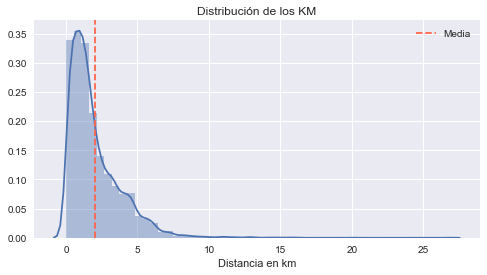

In [74]:
plt.figure(figsize=(8, 4))
sns.distplot(df_sin_imputaciones['distancia'], axlabel='Distancia en km')
plt.axvline(df_sin_imputaciones['distancia'].mean(), color = 'tomato', ls='--', label="Media")
plt.title("Distribución de los KM")
plt.legend();

La distancia en kms se encuentrean principalmente entre 0 y 5 kms, incluyendo datos que podemos considerar outliers (como 25 kms de distancia)

Distancia en km vs tiempo en minutos


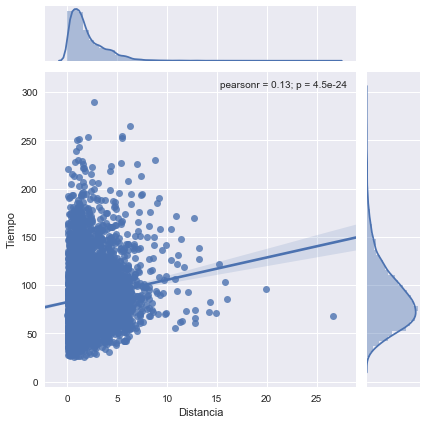

In [75]:
print("Distancia en km vs tiempo en minutos")
sns.jointplot(y='tiempo', x='distancia', data=df_sin_imputaciones, kind="reg")
plt.xlabel("Distancia")
plt.ylabel("Tiempo");

Hay una correlación positiva entre distancia y tiempo, sin embargo es baja y se puede deber a que no puede ser que hay otros atributos que afectan de forma más directa al tiempo, como el día y hora de la semana.

Por ejemplo, si aislamos el día domingo, a las 22 hrs, vemos una correlación positiva entre ambas variables, pero en otros casos esta variable parece no influir, como por ejemplo dia 1 y hora 22.

In [76]:
time = pd.DataFrame(df_sin_imputaciones['entrega'].str.split(':', expand=True))
time.columns = ('hora','minuto','segundos')

df_sin_imputaciones['hora'] = pd.to_numeric(time['hora'])
df_imputados['hora'] = pd.to_numeric(time['hora'])

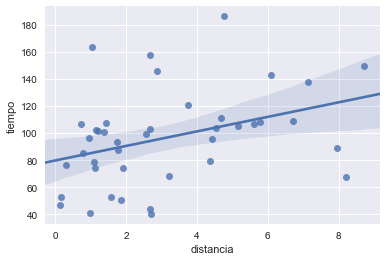

In [77]:
sns.regplot(data=df_sin_imputaciones.query("dia==0 and hora==22"), x='distancia', y='tiempo');

A diferencia del ejemplo anterior aislando el día lunes a la misma hora podemos observar que que la regresión tiende a ser levemente negativa, por lo cual no estamos tan seguro de que el día y la hora son variables relevantes que afecten al tiempo con respecto a la distancia.Ç

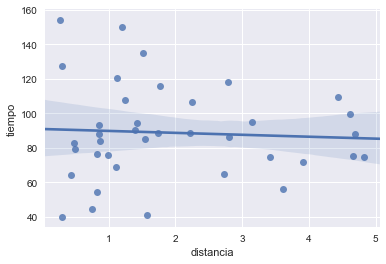

In [78]:
sns.regplot(data=df_sin_imputaciones.query("dia==1 and hora==22"), x='distancia', y='tiempo');

### 2.2 - Cantidad de productos por orden v/s tiempo de entrega

### 2.2.1 - Distribución de productos por orden

In [79]:
df_sin_imputaciones['pesaje'] = np.where(df['pesados'] >= 1, 1, 0)

La mayor cantidad de compras son de cantidades bajas de productos, con un promedio de 16.7 productos por pedido, lo que representa el ticket promedio de la compra de los clientes.

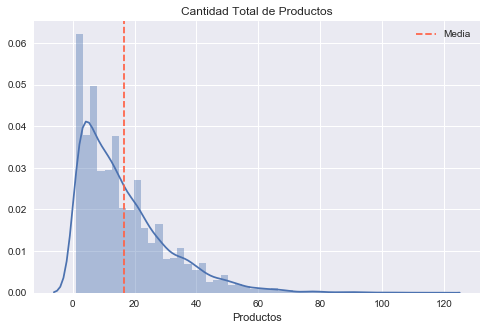

In [80]:
plt.figure(figsize=(8, 5))
sns.distplot(df_sin_imputaciones['cantidad_total'])
plt.axvline(df_sin_imputaciones['cantidad_total'].mean(), color='tomato', ls='--', label="Media")
plt.xlabel("Productos")
plt.title("Cantidad Total de Productos");
plt.legend();

In [81]:
print("Promedio de Productos por compra:", round(df['cantidad_total'].mean(), 2))

Promedio de Productos por compra: 16.73


Se puede observar que en las ordenes de compra mayormente los productos que solicitan son de tipo que deben ser pesados, lo que representa el __62%__ en los __KG__ y un __38%__ en __UN__.

In [82]:
df_sin_imputaciones['pesaje'].value_counts()

1    3595
0    2195
Name: pesaje, dtype: int64

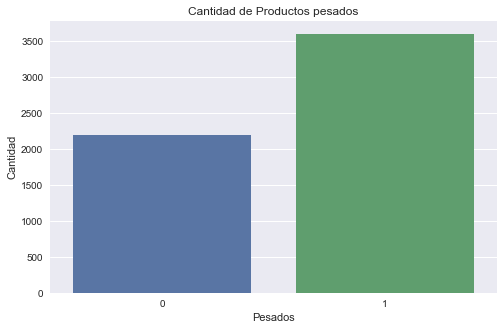

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sin_imputaciones, x='pesaje')
plt.xlabel("Pesados")
plt.ylabel("Cantidad")
plt.title("Cantidad de Productos pesados");

El gráfico ademas nos muestra que aquellas compras que tienen productos que se deben pesar, tienen una distribución diferente a aquellos en los que no se pide ningun producto de pesaje, siendo su promedio mayor en aquellos que deben ser pesados. Se logra apreciar que en las compras con una cantidad hasta 10 productos, predomina los productos que no se pesan, es decir, estas compras chicas mayormente son productos por unidad, por otra parte, a medida que la cantidad de productos de una orden aumenta, los productos por unidad empiezan a decrecer y aumentan los productos que deben ser pesados.

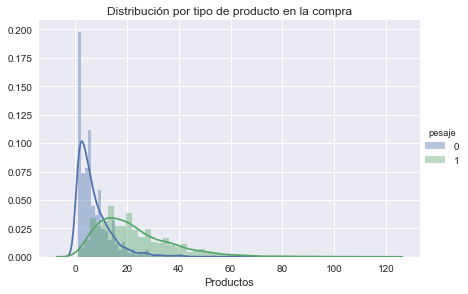

In [84]:
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(df_sin_imputaciones, hue="pesaje", size=4, aspect=1.5)
g = g.map(sns.distplot, "cantidad_total")
g.add_legend()
plt.xlabel("Productos")
plt.title("Distribución por tipo de producto en la compra");

In [85]:
print("Promedio de productos en ordenes sin productos que deban ser pesados = ", round(df_sin_imputaciones.query("pesaje==0")['cantidad_total'].mean(), 2))
print("Promedio de productos en ordenes con productos que deban ser pesados = ", round(df_sin_imputaciones.query("pesaje==1")['cantidad_total'].mean(), 2))

Promedio de productos en ordenes sin productos que deban ser pesados =  7.14
Promedio de productos en ordenes con productos que deban ser pesados =  22.59


### 2.2.2 - Relación con el tiempo de entrega

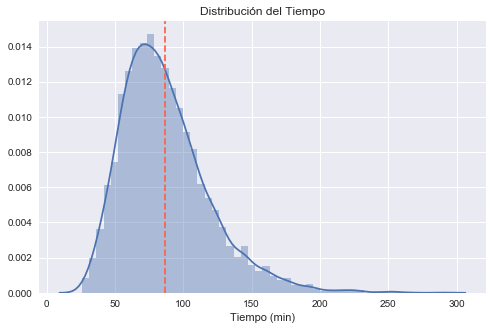

In [86]:
plt.figure(figsize=(8, 5))
sns.distplot(df_sin_imputaciones['tiempo'])
plt.xlabel("Tiempo (min)")
plt.axvline(df_sin_imputaciones['tiempo'].mean(), color='tomato', ls='--', label="Media")
plt.title("Distribución del Tiempo");

In [87]:
print("Promedio del tiempo de entrega:", round(df_sin_imputaciones['tiempo'].mean(), 2))

Promedio del tiempo de entrega: 86.99


El gráfico muestra evidencia para apoyar nuestra hipótesis, ya que se ve una correlación positiva entre la cantidad total de productos con el tiempo de entrega, es decir, a mayor cantidad de productos en una orden de compra, mayor tiempo en la entrega, lo que es algo lógico en este tipo de proceso de compras.

In [88]:
sns.scatterplot(data=df_sin_imputaciones, x='cantidad_total', y='tiempo')
plt.xlabel("Cantidad de Productos")
plt.ylabel("Tiempo")
plt.title("Cantidad de Productos con relación al tiempo");

AttributeError: module 'seaborn' has no attribute 'scatterplot'

### 2.3 - Calificación del repartidor v/s tiempo de entrega

La calificación del recolector se encuentra muy acotada entre los valores 4.50 y 5, haremos una prueba posterior con respecto al tiempo para saber que tan influyente o relevante puede ser.

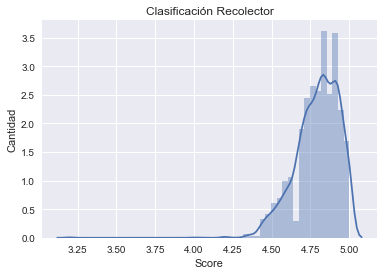

In [89]:
sns.distplot(df_sin_imputaciones.score_recolector)
plt.xlabel("Score")
plt.ylabel("Cantidad")
plt.title("Clasificación Recolector");

En el caso del "Rating" del repartidor, de momento el gráfico no nos permite saber si es influyente en el tiempo de entrega, sobre todo por el hecho de que la distribución de las calificaciones es muy acotada entre 4.50 y 5

In [90]:
sns.scatterplot(data=df_sin_imputaciones, x='score_recolector', y='tiempo')
plt.xlabel("Clasificación Recolector")
plt.ylabel("Tiempo")
plt.title("Clasificación del Recolector con respecto al tiempo");

AttributeError: module 'seaborn' has no attribute 'scatterplot'

### 2.4 - Hora/Día de la semana v/s tiempo de entrega

### 2.4.1 - Atributo "Hora"

La Mayor cantidad de pedidos se concentra entre 10 y 13, cayendo hasta retomar desde las 19 a las 21 hrs

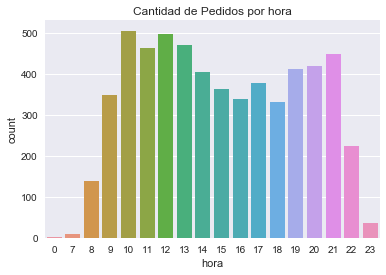

In [91]:
sns.countplot(data=df_sin_imputaciones, x='hora',).set_title('Cantidad de Pedidos por hora');

In [92]:
df_sin_imputaciones.groupby('hora').mean()['tiempo']

hora
0      74.654834
7      49.992801
8      75.386880
9      92.638187
10     85.860162
11     88.057951
12     86.113893
13     88.011048
14     89.563744
15     87.846318
16     83.758758
17     79.285798
18     86.844920
19     87.160881
20     84.746453
21     90.396917
22     92.929559
23    108.009700
Name: tiempo, dtype: float64

Revisando las horas, notamos que a las 9 hay un peak, al igual que a las 19 horas y luego pasado las 21 hrs

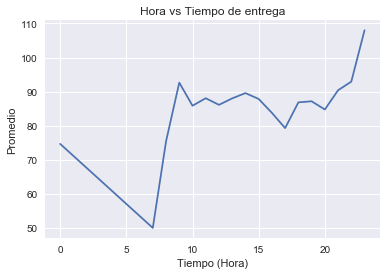

In [93]:
plt.plot(df_sin_imputaciones.groupby('hora').mean()['tiempo'])
plt.xlabel("Tiempo (Hora)")
plt.ylabel("Promedio")
plt.title('Hora vs Tiempo de entrega');

### 2.4.2 - Atributo "Día de la semana"

De Lunes a jueves se concentra la mayor cantidad de pedidos, siendo viernes a domingo los que tienen menos pedidos.

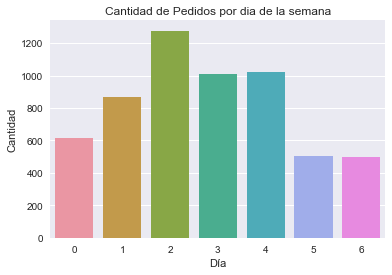

In [94]:
sns.countplot(data=df_sin_imputaciones, x='dia')
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.title('Cantidad de Pedidos por dia de la semana');

El tiempo de entrega es consistente con la cantidad de pedidos de cada día, excepto en el día jueves, donde es menor en promedio que la cantidad de pedidos del mismo día

In [95]:
df_sin_imputaciones.groupby('dia').mean()['tiempo']

dia
0    81.147438
1    90.756681
2    90.570261
3    88.816851
4    85.028184
5    84.869103
6    80.887471
Name: tiempo, dtype: float64

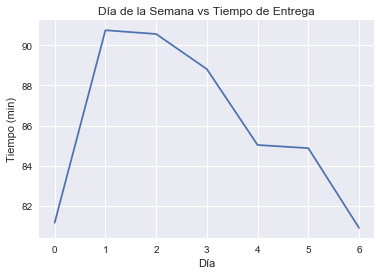

In [96]:
plt.plot(df_sin_imputaciones.groupby('dia').mean()['tiempo'])
plt.title('Día de la Semana vs Tiempo de Entrega')
plt.xlabel("Día")
plt.ylabel("Tiempo (min)");

### 2.4.3 - Día y Fecha

Notamos que diferentes días tienen diferentes peaks de tiempo de demora, por ejemplo, los dias lunes hay grandes tiempos de entrega entre 15 y 16, y luego entre 18 y 22. Por otro lado, el dia martes tiene altos tiempos de entrega duante la mañana. El dia miercoles a las 21 hrs tiene un tiempo de espera superlativamente mayor al resto de los dias.


In [97]:
table = pd.pivot_table(df_sin_imputaciones, values='tiempo', index=['hora'], columns=['dia'], aggfunc=np.mean)

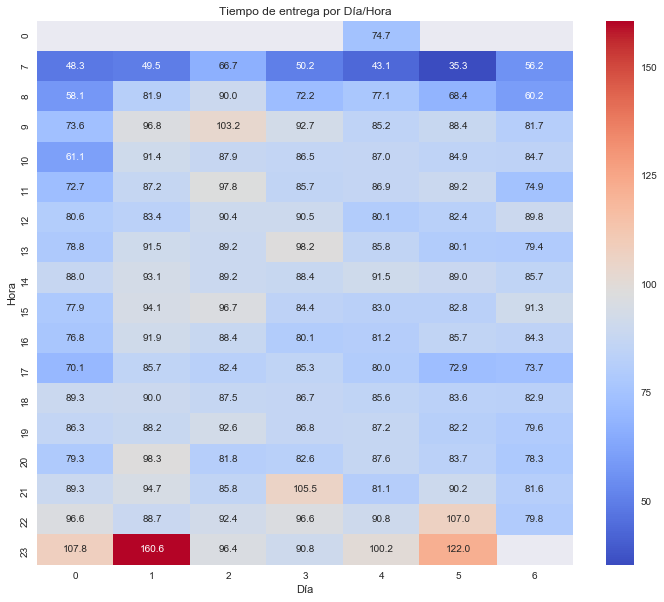

In [98]:
plt.figure(figsize=(12, 10))
sns.heatmap(table,annot=True, cmap='coolwarm', fmt=".1f")
plt.xlabel("Día")
plt.ylabel("Hora")
plt.title("Tiempo de entrega por Día/Hora");

## 3 - Modelamiento predictivo

En este apartado se realizarán los modelos predictivos para el tiempo de entrega. La metodología es la siguiente.

- Para los modelos lineales:

    - Pre procesamiento previos al modelamiento.
    - Análisis de matriz de correlación.
    - Normalización de variables.
    - Creación de conjuntos de entrenamiento y validación (Normalizados).
    - Generación de modelos lineales (LinearRegression, Ridge c/GridserachCV, Lasso c/GirdsearchCV, LinearGAM c/gridsearch).
        - Generación de grillas de hiperparámetros.
        - Entrenamiento.
        - Cálculos de los mejores hiperparámetros.
        - Entrenamiento con los mejores hiperparámetros
        - Cálculo de métricas de desempeño (MAE, RMSE).
    - Refactorización
    - Cálculo de coeficientes (Ridge y Lasso)
    
- Para modelos de ensamble:

    - Creación de conjuntos de entrenamiento y validación (sin Normalizar).
    - Generación de modelos de ensamble (AdaBoostRegressor (DecisionTreeRegressor), RanndomForestRegressor, XGBoostRegressor). Todos aplicando GridSearchCV.
        - Generación de grillas de hiperparámetros.
        - Entrenamiento.
        - Cálculos de los mejores hiperparámetros.
        - Entrenamiento con los mejores hiperparámetros
        - Cálculo de métricas de desempeño (MAE, RMSE).
    - Importancia relativa de atributos en nuestro vector objetivo

Los datasets, a cuales se les aplicara la fase de modelamiento seran los siguientes:

- df_sin_imput (dataset con datos sin imputar y con la columna 'id_entrega'sin segmentar)
- df_imput (dataset con datos imputados y con la columnas 'id_entrega'sin segmentar)
- df_sin_imput1 (dataset con datos sin imputar pero que incluye solo los registros de 'id_entrega' = 1)
- df_sin_imput0 (dataset con datos sin imputar pero que incluye solo los registros de 'id_entrega' = 0)
- df_imput1 (dataset con datos imputados pero que incluye solo los registros de 'id_entrega' = 1)
- df_imput0 (dataset con datos imputados pero que incluye solo los registros de 'id_entrega' = 0)

### 3.1 - Modelamiento con dataset sin imputar con atributo 'id_entrega' sin segmentar.

### 3.1.1 - Pre procesamiento previo

Antes de modelar, se debe realizar un breve procesamiento para dejar de manera óptima nuestro dataset. Este consiste en lo siguiente:

- La columna 'hora' sera binarizada. Para las horas '10', '11', '12', '13', '20', '21' se asignará el valor '1'.  De otra forma se asignará un '0'. La selección de estas horas se debe a que en estas se produce la mayor demanda.

- Eliminamos las columnas 'promesa', "entrega', 'cantidad_total', 'dia', 'pesaje' vara evitar la multicolinealidad.

In [99]:
#Creamos copia del dataframe sin imputaciones original
df_sin_imput = df_sin_imputaciones.copy()


# Binarizamos las horas de mayor demanda como '1' y las que no '0'
df_sin_imput['hora'] = np.where((df_sin_imput['hora'] == 10) | (df_sin_imput['hora'] == 11) |
                                (df_sin_imput['hora'] == 12) | (df_sin_imput['hora'] == 13) |
                                (df_sin_imput['hora'] == 20) | (df_sin_imput['hora'] == 21), 1, 0)

# Eliminamos columnas innecesarias y que pueden producir multicolinealidad
df_sin_imput.drop(columns=['promesa','entrega','cantidad_total','dia','pesaje'], inplace=True)

In [100]:
# Observamos el nuevo dataframe
df_sin_imput.head()

,on_demand,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,1,91.800861,17.0,10.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478,0,1,0,0,0,0,1
1,1,206.599732,88.0,15.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546,0,1,0,0,0,0,1
2,1,93.458001,6.0,0.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018,0,1,0,0,0,0,1
3,1,124.778761,12.0,5.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097,0,1,0,0,0,0,0
4,1,130.321208,28.0,16.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042,0,1,0,0,0,0,1


In [101]:
# Observamos la dimension del dataframe
df_sin_imput.shape

(5790, 19)

### 3.1.2 - Modelos lineales

### 3.1.2.1 - Matriz de correlación

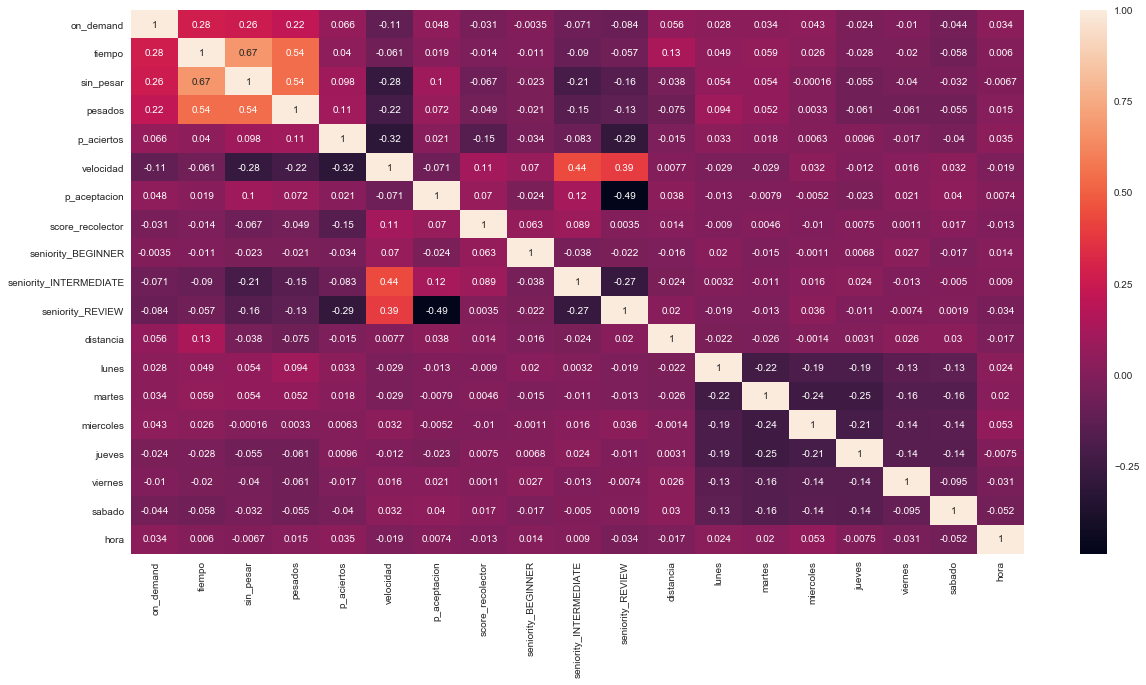

In [102]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_sin_imput.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.1.2.2 - Normalización de variables

In [103]:
# Se normalizan todos los datos del df_sin_imput.
scaler = StandardScaler()
df_sin_imput_scaled = pd.DataFrame(scaler.fit_transform(df_sin_imput), columns = df_sin_imput.columns)

In [104]:
# Previsualizamos el df normalizado
df_sin_imput_scaled.head()

,on_demand,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,0.839611,0.149195,0.351181,1.285023,0.054808,-0.629706,0.599194,-0.797543,-0.055844,-0.680881,-0.397492,-0.438195,-0.419942,1.880856,-0.459671,-0.462149,-0.309787,-0.306764,1.03230
1,0.839611,3.708572,6.754114,2.293410,-0.076472,-1.354821,0.599194,-0.237329,-0.055844,-0.680881,-0.397492,-0.245530,-0.419942,1.880856,-0.459671,-0.462149,-0.309787,-0.306764,1.03230
2,0.839611,0.200575,-0.640823,-0.731751,-0.566037,0.181732,0.599194,1.163206,-0.055844,1.468684,-0.397492,0.188681,-0.419942,1.880856,-0.459671,-0.462149,-0.309787,-0.306764,1.03230
3,0.839611,1.171686,-0.099730,0.276636,0.073953,0.233526,-0.558284,0.883099,-0.055844,1.468684,-0.397492,-0.060719,-0.419942,1.880856,-0.459671,-0.462149,-0.309787,-0.306764,-0.96871
4,0.839611,1.343531,1.343185,2.495087,0.221643,-0.059973,0.599194,0.883099,-0.055844,-0.680881,-0.397492,-0.931906,-0.419942,1.880856,-0.459671,-0.462149,-0.309787,-0.306764,1.03230


### 3.1.2.3 - Conjuntos de entrenamiento y validación (normalizados)

In [105]:
# Se crean conjuntos de entrenamiento y validación (desde df_sin_imput normalizado)
X = df_sin_imput_scaled.drop(columns='tiempo')

# Generamos vector objetivo (desde df_sin_imput sin normalizar)
y = df_sin_imput['tiempo']

#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [106]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (4053, 18)
y_entrenamiento (4053,)
X_validación (1737, 18)
y_validación (1737,)


### 3.1.2.4 - Creación de modelos, refactorizacion y métricas de desempeño

### M1 - LinearRegression

In [107]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [108]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 16.976615572907395
RMSE: 21.89152063648699


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos aplicando la función 'fetch_features'

In [109]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_sin_imput, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.673983,0.673983
pesados,0.544340,0.544340
on_demand,0.275763,0.275763
distancia,0.132431,0.132431
seniority_INTERMEDIATE,0.090093,-0.090093
velocidad,0.060932,-0.060932
martes,0.059037,0.059037
sabado,0.058033,-0.058033
seniority_REVIEW,0.056637,-0.056637


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','on_demand,'distancia','seniority_INTERMEDIATE','velocidad', 'martes', 'sabado','seniority_REVIEW', 'lunes'**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [141]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X_2 = df_sin_imput_scaled.loc[:, ['sin_pesar','pesados','on_demand','distancia','seniority_INTERMEDIATE',
                                  'velocidad','martes', 'sabado','seniority_REVIEW','lunes']]

# Aislamos nuestra variable objetivo
y_2 = df_sin_imput['tiempo']

# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [142]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (4053, 10)
y_entrenamiento (4053,)
X_validación (1737, 10)
y_validación (1737,)


In [143]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2, y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [144]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 17.210586521761268
RMSE: 22.154639130285197


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### M2 - Ridge con GridsearchCV

In [145]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Iniciamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [146]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [147]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [148]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[ 2.53178512 17.06566078  8.48719505  0.1086413   4.81587656 -1.53833046
  0.14513693 -0.02583425 -0.06678917 -0.46641902  5.31893167  1.34759436
  2.14352147  1.82375749  1.70402317  1.23385944  0.19147816  0.25475587]
MAE: 17.044103937812395
RMSE: 21.962620853622195


In [149]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef'])
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
1,sin_pesar,17.065661
2,pesados,8.487195
10,distancia,5.318932
4,velocidad,4.815877
0,on_demand,2.531785
12,martes,2.143521
13,miercoles,1.823757
14,jueves,1.704023
5,p_aceptacion,1.538330
11,lunes,1.347594


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [150]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Iniciamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [151]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [152]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [153]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[16.93512347  8.45952023  2.63861786  5.22556095  0.1088144   4.51325326
  0.74528854 -0.82293764  0.38362178  0.16842952]
MAE: 17.23994154061653
RMSE: 22.196290990761756


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [154]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,16.935123
1,pesados,8.459520
3,distancia,5.225561
5,velocidad,4.513253
2,on_demand,2.638618
7,sabado,0.822938
6,martes,0.745289
8,seniority_REVIEW,0.383622
9,lunes,0.168430
4,seniority_INTERMEDIATE,0.108814


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge refactorizada.

### M3 - Lasso con GridsearchCV

In [155]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Iniciamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [156]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [157]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [158]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[ 2.38536893 18.0825264   8.49100206  0.11097504  5.34527745 -1.7214366
  0.13707823 -0.02838515 -0.09022359 -0.62157541  5.61341394  1.65551063
  2.5206734   2.19013021  2.12463671  1.5361711   0.42181634  0.24624344]
MAE: 16.98775857385754
RMSE: 21.901505448259545


In [159]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
1,sin_pesar,18.082526
2,pesados,8.491002
10,distancia,5.613414
4,velocidad,5.345277
12,martes,2.520673
0,on_demand,2.385369
13,miercoles,2.190130
14,jueves,2.124637
5,p_aceptacion,1.721437
11,lunes,1.655511


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [160]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [161]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.03}

In [162]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [163]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[17.91597559  8.45942171  2.52010245  5.4954991   0.03141976  5.03252926
  0.6923104  -0.84705226  0.28103093  0.10278374]
MAE: 17.212494459761775
RMSE: 22.156500828444134


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [164]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,on_demand,17.915976
1,sin_pesar,8.459422
3,p_aciertos,5.495499
5,p_aceptacion,5.032529
2,pesados,2.520102
7,seniority_BEGINNER,0.847052
6,score_recolector,0.692310
8,seniority_INTERMEDIATE,0.281031
9,seniority_REVIEW,0.102784
4,velocidad,0.031420


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M4 - LinearGAM con GridSearch

In [165]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [166]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_sin_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_sin_imput.sav', 'wb'))

In [167]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [168]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 16.64958309424225
RMSE: 21.579460235488977


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [169]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [170]:
# Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_sin_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_sin_imput.sav', 'wb'))

In [171]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [172]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 17.056946844231728
RMSE: 21.988581145878463


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### 3.1.3 - Modelos de ensamble

### 3.1.3.1 - Conjuntos de entrenamientos y validación (sin normalizar)

A diferencia de los modelos lineales, trabajaremos con conjuntos de validacion y entrenamiento no normalizados

In [142]:
# Se crean conjuntos de entrenamiento y validación (desde df_sin_imput sin normalizar)
X = df_sin_imput.drop(columns='tiempo')

# Generamos vector objetivo (desde df_sin_imput sin normalizar)
y = df_sin_imput['tiempo']

#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [143]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (4053, 18)
y_entrenamiento (4053,)
X_validación (1737, 18)
y_validación (1737,)


### 3.1.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M5 - AdaBoost Regressor (DecisionTreeRegressor)

In [144]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

# Generamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Generamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [145]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_sin_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_sin_imput.sav', 'wb'))

In [146]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 2,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 1000}

In [147]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [148]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 20.088026196404748
RMSE: 25.128350334187484


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Ada Boost. Utilizaremos la función 'plot_feature_importance'

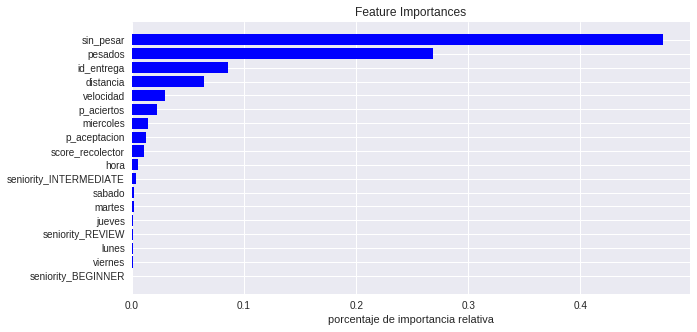

In [149]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (48% aprox)
- pesados (27% aprox) 
- id_entrega (9% aprox)
- distancia (7% aprox)
- velocidad (4% aprox)

### M6 - RandomForestRegressor

In [150]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [151]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_sin_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_sin_imput.sav', 'wb'))

In [152]:
# Obtenemos los mejores hiperparámetros
mod_rfr_gcv.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [153]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

In [154]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

MAE: 17.306517238006826
RMSE: 22.448193426332242


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

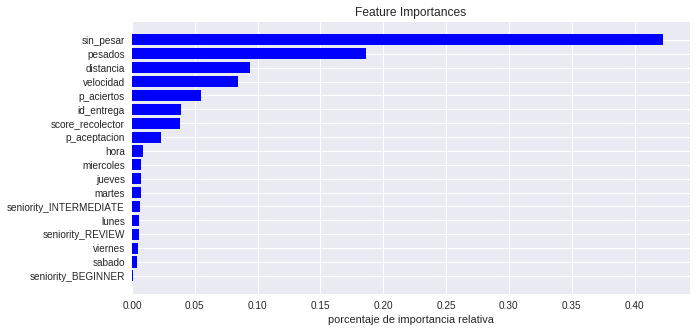

In [155]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (43% aprox)
- pesados (18% aprox)
- distancia (9% aprox)
- velocidad (8% aprox)
- p_aciertos (5.5% aprox)

### M7 - XGBoost Regressor

In [156]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

# Iniciamos modelo
mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [157]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_sin_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_sin_imput.sav', 'wb'))

[00:34:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [158]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 4,
 'subsample': 0.6}

In [159]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [160]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 16.604273583885284
RMSE: 21.523198578491797


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB regressor. Utilizaremos la función 'plot_feature_importance'

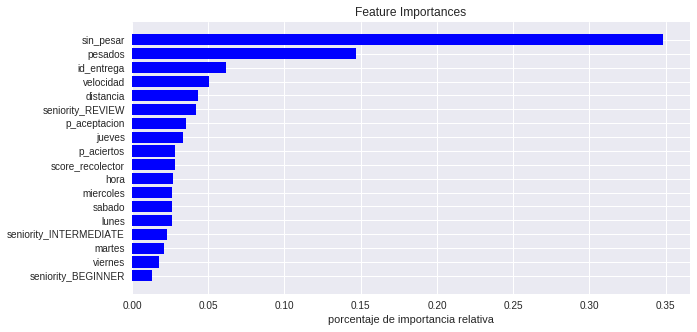

In [161]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (casi 35% aprox)
- pesados (casi 15% aprox)
- id_entrega (6% aprox)
- velocidad (casi 5%)
- distancia (4% aprox)

### 3.2 - Modelamiento con dataset imputado y atributo "on_demand" sin segmentar

### 3.2.1 - Pre procesamiento previo al modelamiento

Antes de modelar, se debe realizar un breve procesamiento para dejar de manera optima nuestro dataset. Este consiste en lo siguiente:

- La columnas hora sera binarizada. Para las horas '10', '11', '12', '13', '20', '21' se asignará el valor '1'.  De otra forma se asignará un '0'. La selección de estas horas se debe a que en estas se produce la mayor demanda.

In [173]:
#Creamos copia del dataframe sin imputaciones original
df_imput = df_imputados.copy()

df_imput['hora'] = np.where((df_imput['hora'] == 10) | (df_imput['hora'] == 11) |
                            (df_imput['hora'] == 12) | (df_imput['hora'] == 13) |
                            (df_imput['hora'] == 20) | (df_imput['hora'] == 21), 1, 0)

In [174]:
# Observamos el dataset sin imputar
df_imput.head()

,on_demand,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,1,91.800861,17.0,10.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478,0,1,0,0,0,0,1
1,1,206.599732,88.0,15.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546,0,1,0,0,0,0,1
2,1,93.458001,6.0,0.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018,0,1,0,0,0,0,1
3,1,124.778761,12.0,5.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097,0,1,0,0,0,0,0
4,1,130.321208,28.0,16.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042,0,1,0,0,0,0,1


In [175]:
# Observamos la dimension del dataframe
df_imput.shape

(6543, 19)

### 3.2.2 - Modelos lineales

### 3.2.2.1 - Matriz de correlación

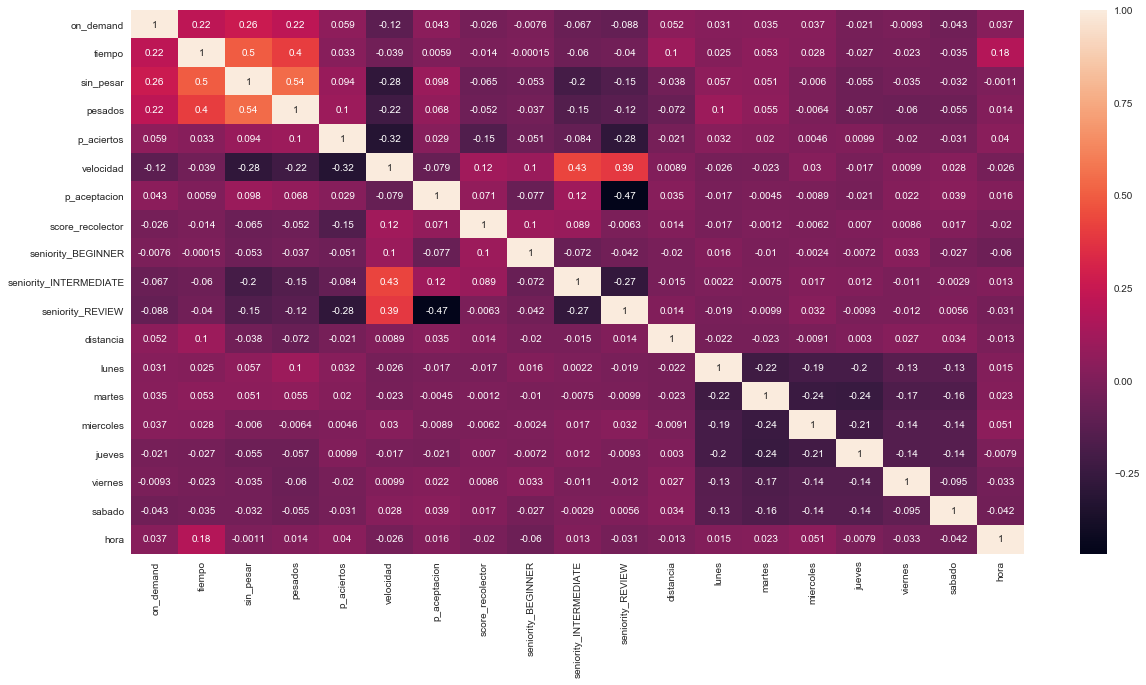

In [176]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_imput.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.2.2.2 - Normalización de datos

In [177]:
# Se normalizan todos los datos del dataframe df_imput.
scaler = StandardScaler()
df_imput_scaled = pd.DataFrame(scaler.fit_transform(df_imput), columns = df_imput.columns)

In [178]:
# Previsualizamos el df normalizado
df_imput_scaled.head()

,on_demand,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,0.845619,0.329363,0.356406,1.292720,0.064384,-0.641425,0.597015,-0.808107,-0.106221,-0.676914,-0.398074,-0.438770,-0.424243,1.893448,-0.457143,-0.462996,-0.313054,-0.303543,1.155112
1,0.845619,3.295380,6.752924,2.306570,-0.067059,-1.367072,0.597015,-0.247192,-0.106221,-0.676914,-0.398074,-0.244512,-0.424243,1.893448,-0.457143,-0.462996,-0.313054,-0.303543,1.155112
2,0.845619,0.372178,-0.634603,-0.734979,-0.557231,0.170608,0.597015,1.155095,-0.106221,1.477292,-0.398074,0.193286,-0.424243,1.893448,-0.457143,-0.462996,-0.313054,-0.303543,1.155112
3,0.845619,1.181401,-0.094053,0.278871,0.083553,0.222440,-0.535236,0.874638,-0.106221,1.477292,-0.398074,-0.058175,-0.424243,1.893448,-0.457143,-0.462996,-0.313054,-0.303543,-0.865717
4,0.845619,1.324599,1.347416,2.509340,0.231426,-0.071274,0.597015,0.874638,-0.106221,-0.676914,-0.398074,-0.936560,-0.424243,1.893448,-0.457143,-0.462996,-0.313054,-0.303543,1.155112


### 3.2.2.3 - Conjuntos de entrenamiento y validación (normalizados)

Estos conjuntos se utilizarán para todos los modelos lineales.

In [179]:
# Se crean conjuntos de entrenamiento y validación (desde df_imput normalizado)
X = df_imput_scaled.drop(columns='tiempo')
#X = df_modelo_lineal.iloc[:, 1:17]
# Generamos vector objetivo (desde df sin normalizar)
y = df_imput['tiempo']

#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [180]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (4580, 18)
y_entrenamiento (4580,)
X_validación (1963, 18)
y_validación (1963,)


### 3.2.2.4 - Creación de modelos, refactorización y métricas de desempeño

### M1 - LinearRegression

In [181]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [182]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 22.60960818393192
RMSE: 31.3234960345522


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos. Seleccionamos los 10 atributos con más correlacion y generamos un nuevo LinearRegression

In [183]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_imput, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.501149,0.501149
pesados,0.404643,0.404643
on_demand,0.215560,0.215560
hora,0.181979,0.181979
distancia,0.102943,0.102943
seniority_INTERMEDIATE,0.060293,-0.060293
martes,0.053219,0.053219
seniority_REVIEW,0.040028,-0.040028
velocidad,0.039491,-0.039491


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','id_entrega','distancia','seniority_INTERMEDIATE','martes', 'seniority_REVIEW', 'velocidad','sabado', 'p_aciertos'**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [184]:
# separemos los vectores a trabajar
X_2 = df_imput_scaled.loc[:, ['sin_pesar','pesados','on_demand','distancia','seniority_INTERMEDIATE','martes', 
                              'seniority_REVIEW', 'velocidad','sabado', 'p_aciertos']]
y_2 = df_imput['tiempo']

# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [185]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (4580, 10)
y_entrenamiento (4580,)
X_validación (1963, 10)
y_validación (1963,)


In [186]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2, y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [187]:
# Métricas de desempeño)
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 22.705894388941502
RMSE: 32.129513419655346


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### M2 - Ridge con GridsearchCV

In [188]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [189]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [190]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [191]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[ 2.63372027 15.59614753  7.73181794  0.13466337  4.40642463 -2.36474212
  1.02544327  0.18588836  0.24732518 -0.45021907  5.1506781   0.57458749
  2.06940641  1.60000121  1.75887421  1.36665097  0.62083161  6.72255517]
MAE: 22.610015280012934
RMSE: 31.325424804332563


In [192]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
1,sin_pesar,15.596148
2,pesados,7.731818
17,hora,6.722555
10,distancia,5.150678
4,velocidad,4.406425
0,on_demand,2.633720
5,p_aceptacion,2.364742
12,martes,2.069406
14,jueves,1.758874
13,miercoles,1.600001


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [193]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [194]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [195]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [196]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[15.26160254  7.75045847  2.99447237  5.02126711  0.47716516  0.9115447
  0.56104711  4.05484686 -0.55200157  0.39506392]
MAE: 22.738138976410866
RMSE: 32.13742861919072


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [197]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,15.261603
1,pesados,7.750458
3,distancia,5.021267
7,velocidad,4.054847
2,on_demand,2.994472
5,martes,0.911545
6,seniority_REVIEW,0.561047
8,sabado,0.552002
4,seniority_INTERMEDIATE,0.477165
9,p_aciertos,0.395064


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge refactorizada.

### M3 - Lasso con GridsearchCV

In [198]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [199]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [200]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [201]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[ 2.51841814 16.3632109   7.73927227  0.12506842  4.87600094 -2.5747202
  1.05748962  0.14944983  0.14214191 -0.63156901  5.3881846   0.75550822
  2.34253235  1.83971104  2.06635351  1.58816243  0.80447836  6.99350239]
MAE: 22.60600844159995
RMSE: 31.32100093680201


In [202]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
1,sin_pesar,16.363211
2,pesados,7.739272
17,hora,6.993502
10,distancia,5.388185
4,velocidad,4.876001
5,p_aceptacion,2.574720
0,on_demand,2.518418
12,martes,2.342532
14,jueves,2.066354
13,miercoles,1.839711


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [203]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [204]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.03}

In [205]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [206]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[15.97811985  7.76457722  2.92550134  5.2436255   0.43248449  0.90606118
  0.50326631  4.44390791 -0.53770386  0.42417442]
MAE: 22.7050627857999
RMSE: 32.128743859026194


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [207]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,on_demand,15.978120
1,sin_pesar,7.764577
3,p_aciertos,5.243626
7,seniority_BEGINNER,4.443908
2,pesados,2.925501
5,p_aceptacion,0.906061
8,seniority_INTERMEDIATE,0.537704
6,score_recolector,0.503266
4,velocidad,0.432484
9,seniority_REVIEW,0.424174


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M4 - LinearGAM con GridSearch

In [208]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [209]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_imput.sav', 'wb'))

In [210]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [211]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 22.390069656858078
RMSE: 31.166576594479594


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [212]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [213]:
 # Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_imput.sav', 'wb'))

In [214]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [215]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 22.539896431982864
RMSE: 32.050791285824715


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### 3.2.3 - Modelos de ensamble

### 3.2.3.1 - Conjuntos de entrenamientos y validación (sin normalizar)

A diferencia de los modelos lineales, trabajaremos con conjuntos de validacion y entrenamiento no normalizados

In [216]:
# Se crean conjuntos de entrenamiento y validación (desde df_imput sin normalizado)
X = df_imput.drop(columns='tiempo')

# Generamos vector objetivo (desde df_imput sin normalizar)
y = df_imput['tiempo']

#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [217]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (4580, 18)
y_entrenamiento (4580,)
X_validación (1963, 18)
y_validación (1963,)


### 3.2.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M5 - AdaBoost Regressor (DecisionTreeRegressor)

In [218]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

# Generamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Generamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [220]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_imput.sav', 'wb'))

In [221]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 4,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 1000}

In [222]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [223]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 25.338662948690782
RMSE: 33.623032975714274


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Ada Boost. Utilizaremos la función 'plot_feature_importance'

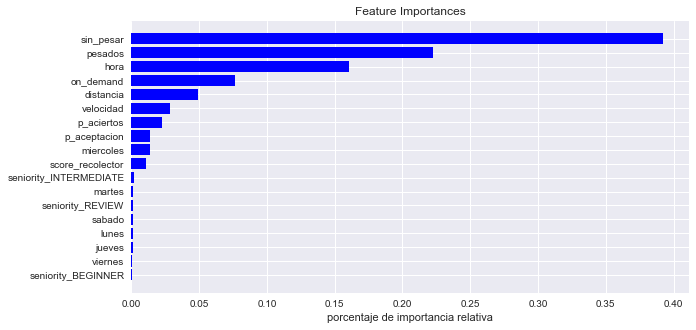

In [224]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (39% aprox)
- pesados (23% aprox)
- hora (16% aprox)
- id_entrega (7,5% aprox)
- distancia (casi 5% aprox)

### M6 - RandomForestRegressor

In [231]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [232]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_imput.sav', 'wb'))

In [233]:
# Obtenemos los mejores hiperparámetros
mod_rfr_gcv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [234]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [235]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

NameError: name 'mod_best_rfr_predict' is not defined

#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

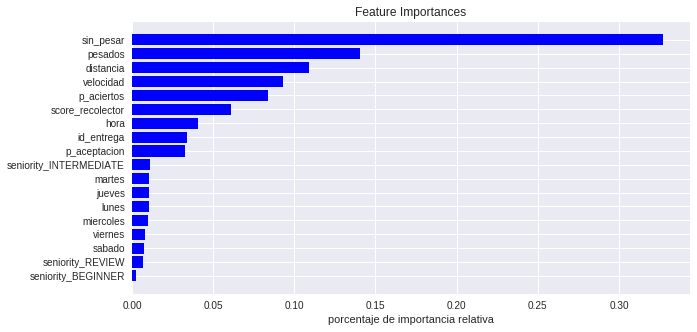

In [218]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (33% aprox)
- pesados (14,5% aprox)
- distancia (11% aprox)
- velocidad (9% aprox)
- p_aciertos (8% aprox)

### M7 - XGBoost Regression

In [236]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

# Iniciamos modelo
mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [237]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_imput.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_imput.sav', 'wb'))

[15:31:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [238]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 2,
 'min_child_weight': 4,
 'subsample': 0.8}

In [239]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [240]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 22.549243517371668
RMSE: 31.308341426617083


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB Regressor. Utilizaremos la función 'plot_feature_importance'

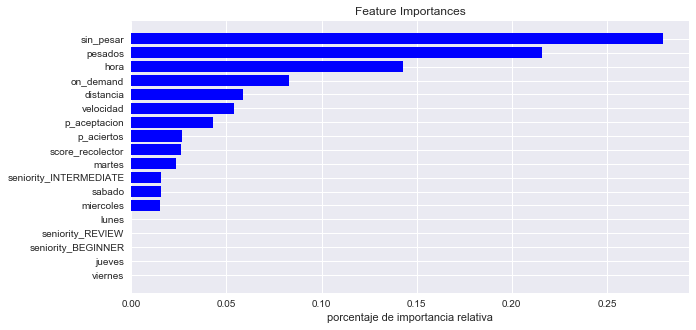

In [241]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (28% aprox)
- pesados (21% aprox)
- hora (13,5% aprox)
- id_entrega (7% aprox)
- velocidad (6% aprox))

### 3.3 - Modelamiento con dataset sin imputar y atributo “id_entrega” = 1

### 3.3.1 - Pre procesamiento previo al modelamiento

Primero seleccionamos solos los registros donde 'id_entrega' sea igual 1

In [243]:
# Creamos copia del df sin imputar
df_sin_imput_copy = df_sin_imput.copy()
# Creamos nuevo df con solo los registros que tenga on_demand=1
df_sin_imput1 = df_sin_imput_copy.loc[df_sin_imput_copy['on_demand'] == 1]
# Visualizamos previa del nuevo df
df_sin_imput1.head()

,on_demand,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,1,91.800861,17.0,10.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478,0,1,0,0,0,0,1
1,1,206.599732,88.0,15.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546,0,1,0,0,0,0,1
2,1,93.458001,6.0,0.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018,0,1,0,0,0,0,1
3,1,124.778761,12.0,5.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097,0,1,0,0,0,0,0
4,1,130.321208,28.0,16.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042,0,1,0,0,0,0,1


Luego eliminamos la columna 'id_entrega' ya que es constante

In [244]:
# eliminamos columnas on_deman ya que es constante
df_sin_imput1.drop(columns=['on_demand'], inplace=True)

# revisamos la dimensión del nuevo df
df_sin_imput1.shape

(3396, 18)

### 3.3.2 - Modelos lineales

### 3.3.2.1 - Matriz de correlacion

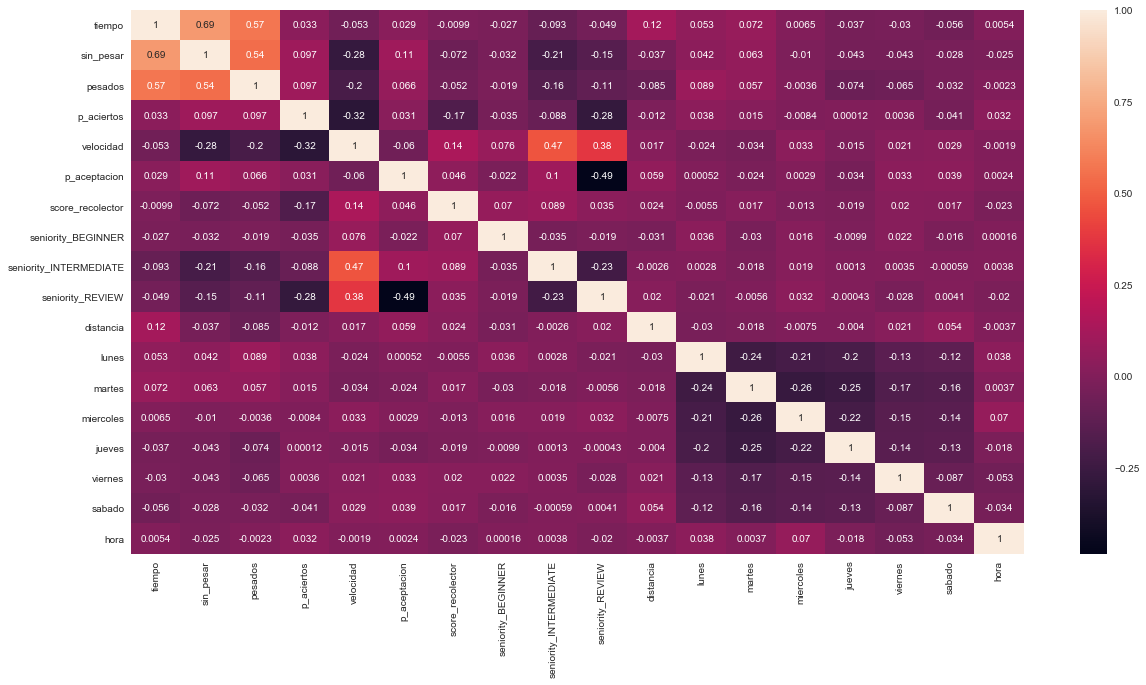

In [246]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_sin_imput1.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.3.2.2 - Normalización de variables

In [247]:
# Se normalizan/escalan todos los datos del dataframe.
scaler = StandardScaler()
df_sin_imput1_scaled = pd.DataFrame(scaler.fit_transform(df_sin_imput1), columns = df_sin_imput1.columns)

In [248]:
# Previsualizamos el df normalizado
df_sin_imput1_scaled.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,-0.075306,0.116899,0.962802,-0.000201,-0.551332,0.558757,-0.783797,-0.054345,-0.637347,-0.355483,-0.485338,-0.43387,1.817741,-0.481429,-0.450055,-0.304985,-0.286135,1.002949
1,3.180036,5.746258,1.843025,-0.133080,-1.300932,0.558757,-0.214677,-0.054345,-0.637347,-0.355483,-0.292605,-0.43387,1.817741,-0.481429,-0.450055,-0.304985,-0.286135,1.002949
2,-0.028314,-0.755255,-0.797644,-0.628608,0.287507,0.558757,1.208123,-0.054345,1.569004,-0.355483,0.141757,-0.43387,1.817741,-0.481429,-0.450055,-0.304985,-0.286135,1.002949
3,0.859846,-0.279535,0.082579,0.019177,0.341049,-0.599292,0.923563,-0.054345,1.569004,-0.355483,-0.107730,-0.43387,1.817741,-0.481429,-0.450055,-0.304985,-0.286135,-0.997060
4,1.017012,0.989053,2.019070,0.168666,0.037640,0.558757,0.923563,-0.054345,-0.637347,-0.355483,-0.979222,-0.43387,1.817741,-0.481429,-0.450055,-0.304985,-0.286135,1.002949


### 3.3.2.3 - Conjuntos de entrenamiento y validación (Normalizados)

In [249]:
# Se crean conjuntos de entrenamiento y validación (desde df_sin_imput1 normalizado)
X = df_sin_imput1_scaled.drop(columns='tiempo')
# Generamos vector objetivo (desde df_sin_imput1 sin normalizar)
y = df_sin_imput1['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [250]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (2377, 17)
y_entrenamiento (2377,)
X_validación (1019, 17)
y_validación (1019,)


### 3.3.2.4 - Creación de modelos, refactorización y métricas de desempeño

### M1 - Linear Regression

In [251]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [252]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 17.92899051922562
RMSE: 22.600105899711853


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos. Seleccionamos los 10 atributos con más correlacion y generamos un nuevo LinearRegression

In [253]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_sin_imput1, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.690333,0.690333
pesados,0.573138,0.573138
distancia,0.120434,0.120434
seniority_INTERMEDIATE,0.093499,-0.093499
martes,0.071858,0.071858
sabado,0.055566,-0.055566
velocidad,0.053442,-0.053442
lunes,0.052771,0.052771
seniority_REVIEW,0.049497,-0.049497


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','distancia','seniority_INTERMEDIATE','martes','sabado','velocidad','lunes','seniority_REVIEW','jueves'**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [254]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X_2 = df_sin_imput1_scaled.loc[:, ['sin_pesar','pesados','distancia','seniority_INTERMEDIATE','martes',
                                   'sabado','velocidad','lunes','seniority_REVIEW','jueves']]
y_2 = df_sin_imput1['tiempo']
# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [255]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (2377, 10)
y_entrenamiento (2377,)
X_validación (1019, 10)
y_validación (1019,)


In [256]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2,y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [257]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 18.001827386288813
RMSE: 22.674070690384806


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### M2 - Ridge con GridserachCV

In [258]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [259]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [260]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [261]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[18.66798592 10.87558746  0.22633532  4.87396802 -1.7408687   0.42541261
 -0.3958185   0.16878056 -0.50024284  6.05750041  1.69613025  2.32344322
  1.85545444  1.47611517  1.26712083 -0.84738255  0.61779043]
MAE: 17.90877943898695
RMSE: 22.58171760311253


In [262]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,18.667986
1,pesados,10.875587
9,distancia,6.057500
3,velocidad,4.873968
11,martes,2.323443
12,miercoles,1.855454
4,p_aceptacion,1.740869
10,lunes,1.696130
13,jueves,1.476115
14,viernes,1.267121


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [263]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [264]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [265]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [266]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[18.58231784 10.85089957  5.95731558  0.38280193  1.19472833 -1.66483035
  4.58972587  0.65770734  0.31936408  0.42461513]
MAE: 17.976548115348265
RMSE: 22.657231277444335


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [267]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,18.582318
1,pesados,10.850900
2,distancia,5.957316
6,velocidad,4.589726
5,sabado,1.664830
4,martes,1.194728
7,lunes,0.657707
9,jueves,0.424615
3,seniority_INTERMEDIATE,0.382802
8,seniority_REVIEW,0.319364


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge refactorizada.

### M3 - Lasso con GridsearchCV

In [268]:
#Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [269]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [270]:
#Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [271]:
#Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[20.33210462 11.12015256  0.20825423  5.95471393 -2.13300408  0.4509261
 -0.44120378 -0.         -0.83594222  6.63356941  2.4658935   3.24274703
  2.73156819  2.40174101  1.95601633 -0.37076756  0.6470978 ]
MAE: 17.92127747582499
RMSE: 22.588172826873638


In [272]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,20.332105
1,pesados,11.120153
9,distancia,6.633569
3,velocidad,5.954714
11,martes,3.242747
12,miercoles,2.731568
10,lunes,2.465894
13,jueves,2.401741
4,p_aceptacion,2.133004
14,viernes,1.956016


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [273]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [274]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.03}

In [275]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [276]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[20.22662628 11.08859909  6.49062312  0.29094496  1.19428535 -1.80907998
  5.55059856  0.61308414  0.22324438  0.52672748]
MAE: 17.997031062912768
RMSE: 22.666297562089383


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [277]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,20.226626
1,pesados,11.088599
2,p_aciertos,6.490623
6,seniority_BEGINNER,5.550599
5,score_recolector,1.809080
4,p_aceptacion,1.194285
7,seniority_INTERMEDIATE,0.613084
9,distancia,0.526727
3,velocidad,0.290945
8,seniority_REVIEW,0.223244


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M4 - LinearGAM con Gridsearch

In [278]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [279]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_sin_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_sin_imput1.sav', 'wb'))

In [280]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [281]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 17.676386036909154
RMSE: 22.357113236961347


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [282]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [283]:
# Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_sin_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_sin_imput1.sav', 'wb'))

In [284]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [285]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 17.872924334543146
RMSE: 22.516918975073022


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### 3.3.3 - Modelos de ensamble

### 3.3.3.1 - Conjuntos de entrenamiento y validacion (sin Normalizar)

In [286]:
#Se crean conjuntos de entrenamiento y validación (desde df_sin_imput1 sin normalizar)
X = df_sin_imput1.drop(columns='tiempo')
# Generamos vector objetivo (desde df_sin_imput1 sin normalizar)
y = df_sin_imput1['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [287]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (2377, 17)
y_entrenamiento (2377,)
X_validación (1019, 17)
y_validación (1019,)


### 3.3.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M5 - AdaBoost Regressor (DecisionTreeRegressor)

In [288]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

# Iniciamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Iniciamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [289]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_sin_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_sin_imput1.sav', 'wb'))

In [290]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 2,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 1000}

In [291]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [292]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 20.529774437476288
RMSE: 25.494905720353454


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo AdaBoost. Utilizaremos la función 'plot_feature_importance'

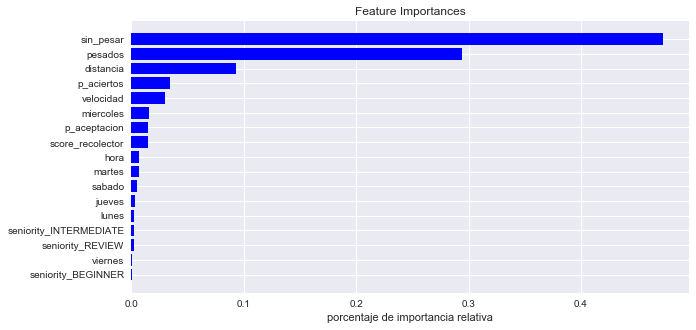

In [293]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (47% aprox)
- pesados (28,5% aprox)
- distancia (casi 10%)
- p_aciertos (4% aprox)
- velocidad (3,5% aprox)

### M6 - RandomForestRegressor

In [294]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [295]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_sin_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_sin_imput1.sav', 'wb'))

In [296]:
# Obtenemos los mejores hiperparámetros
mod_rfr_gcv.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [297]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [298]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

NameError: name 'mod_best_rfr_predict' is not defined

#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

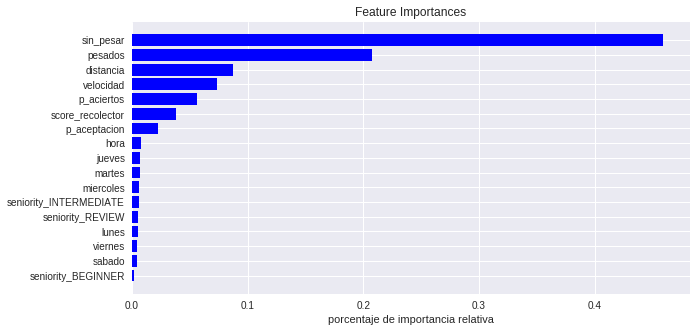

In [280]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (47% aprox)
- pesados (21% aprox)
- distancia (9% aprox)
- velocidad (8% aprox)
- p_aciertos (6% aprox)

### M7 - XGBoost Regressor

In [299]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

# Iniciamos modelo
mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [300]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_sin_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_sin_imput1.sav', 'wb'))

In [301]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.7}

In [302]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [303]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 17.939656334994957
RMSE: 22.51793866997847


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB Regressor. Utilizaremos la función 'plot_feature_importance'

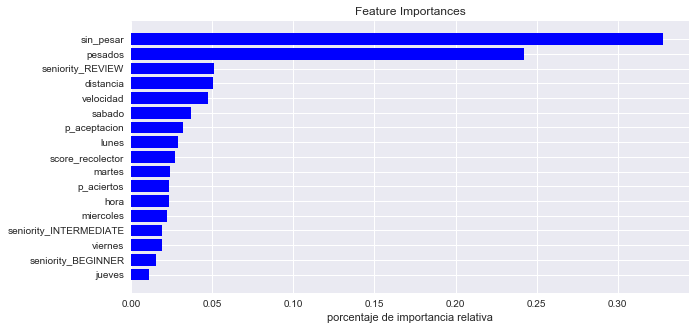

In [304]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (39% aprox)
- pesados (17% aprox)
- distanca (5% aprox)
- velocidad (5% aprox)
- sabado (4% aprox))

### 3.4 - Modelamiento con data set sin imputar y atributo "on_demand" = 0

### 3.4.1 - Pre procesamiento previo al modelamiento

Primero seleccionamos solos los registros donde 'id_entrega' sea igual 0

In [305]:
# Creamos nuevo df con solo los registros que tenga on_demand=0 (desde df_sin_imput)
df_sin_imput0 = df_sin_imput_copy.loc[df_sin_imput_copy['on_demand'] == 0]

Luego eliminamos la columnas 'id_entrega' ya que es constante

In [307]:
# eliminamos columna id_entrega
df_sin_imput0.drop(columns=['on_demand'], inplace=True)

# Visualizamos previa del nuevo df
df_sin_imput0.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
136,113.281087,4.0,3.0,0.8445,2.56,0.84,4.47,0,0,1,1.798251,0,1,0,0,0,0,0
139,84.248618,10.0,1.0,0.8577,1.58,1.00,4.56,0,0,0,2.587815,0,1,0,0,0,0,0
141,156.702988,12.0,0.0,0.8560,2.11,0.96,4.64,0,1,0,3.496377,0,1,0,0,0,0,1
148,114.367828,20.0,5.0,0.9053,1.48,0.96,4.68,0,0,0,0.341157,0,1,0,0,0,0,1
153,100.733187,27.0,1.0,0.8400,2.40,0.96,4.72,0,1,0,1.571134,0,1,0,0,0,0,1


### 3.4.2 - Modelos lineales

### 3.4.2.1 - Matriz de correlación

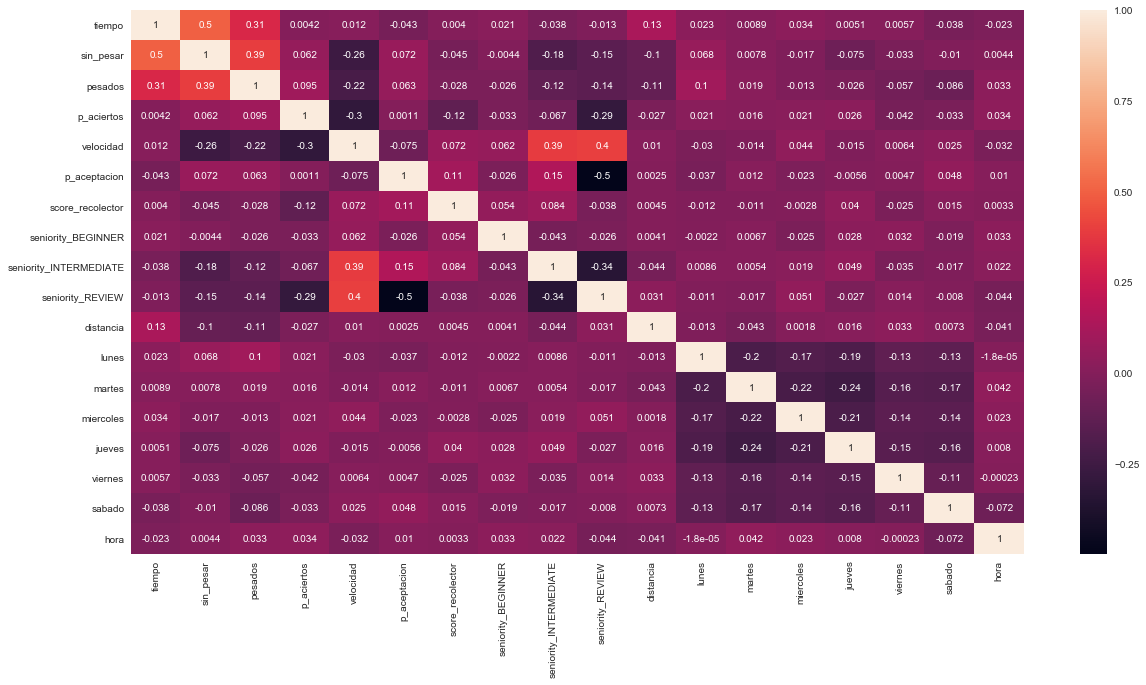

In [308]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_sin_imput0.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.4.2.2 - Normalizacion de datos

In [309]:
# Se normalizan/escalan todos los datos del dataframe.
scaler = StandardScaler()
df_sin_imput0_scaled = pd.DataFrame(scaler.fit_transform(df_sin_imput0), columns = df_sin_imput0.columns)

In [310]:
# Previsualizamos el df normalizado
df_sin_imput0_scaled.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,1.558120,-0.789495,0.197543,-0.190398,0.932780,-1.661572,-2.258366,-0.057904,-0.744000,2.203021,-0.048813,-0.399855,1.978841,-0.428242,-0.479149,-0.316518,-0.33457,-0.929777
1,0.331719,0.045456,-0.408373,0.166443,-0.711124,0.658359,-1.640877,-0.057904,-0.744000,-0.453922,0.379825,-0.399855,1.978841,-0.428242,-0.479149,-0.316518,-0.33457,-0.929777
2,3.392367,0.323773,-0.711331,0.120486,0.177926,0.078376,-1.091998,-0.057904,1.344085,-0.453922,0.873065,-0.399855,1.978841,-0.428242,-0.479149,-0.316518,-0.33457,1.075526
3,1.604027,1.437041,0.803458,1.453236,-0.878869,0.078376,-0.817558,-0.057904,-0.744000,-0.453922,-0.839841,-0.399855,1.978841,-0.428242,-0.479149,-0.316518,-0.33457,1.075526
4,1.028067,2.411150,-0.408373,-0.312049,0.664388,0.078376,-0.543119,-0.057904,1.344085,-0.453922,-0.172111,-0.399855,1.978841,-0.428242,-0.479149,-0.316518,-0.33457,1.075526


### 3.4.2.3 - Creación de conjuntos de entrenamiento y validación (Normalizados)

In [311]:
# Se crean conjuntos de entrenamiento y validación (desde df_sin_imput0 normalizado)
X = df_sin_imput0_scaled.drop(columns='tiempo')
# Generamos vector objetivo (desde df_sin_imput0 sin normalizar)
y = df_sin_imput0['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [312]:
# Dimensión de nuestros conjuntos
print('X entrenamiento', X_train.shape)
print('X validación', X_test.shape)
print('y entrenamiento', y_train.shape)
print('y validación', y_test.shape)

X entrenamiento (1675, 17)
X validación (719, 17)
y entrenamiento (1675,)
y validación (719,)


### 3.4.2.4 - Creación de modelos, refactorización y métricas de desempeño

### M1 - LinearRegression

In [313]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [314]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 14.945805825130655
RMSE: 19.337241805758406


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos. Seleccionamos los 10 atributos con más correlacion y generamos un nuevo LinearRegression

In [315]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_sin_imput0, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.502144,0.502144
pesados,0.314200,0.314200
distancia,0.131562,0.131562
p_aceptacion,0.043399,-0.043399
seniority_INTERMEDIATE,0.038373,-0.038373
sabado,0.037811,-0.037811
miercoles,0.034045,0.034045
hora,0.022948,-0.022948
lunes,0.022571,0.022571


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','distancia','p_aceptacion','seniority_INTERMEDIATE','sabado','miercoles','hora','lunes','seniority_BEGINNER',**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [316]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X_2 = df_sin_imput0_scaled.loc[:, ['sin_pesar','pesados','distancia','p_aceptacion','seniority_INTERMEDIATE',
                                   'sabado','miercoles','hora','lunes','seniority_BEGINNER']]
y_2 = df_sin_imput0['tiempo']
# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [317]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (1675, 10)
y_entrenamiento (1675,)
X_validación (719, 10)
y_validación (719,)


In [318]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2,y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [319]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 15.431260922078833
RMSE: 19.760987480734297


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### M2 - Ridge con GridsearchCV

In [320]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [321]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [322]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [323]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[10.96845177  4.12742322  0.09256399  3.3288756  -1.83471748  0.08935384
  0.17765068  0.41420642 -0.35706625  4.38675545  0.20965265  1.32082528
  1.06247995  1.28456375  1.19062522  0.27628934 -0.49395045]
MAE: 15.00217132503883
RMSE: 19.35481375563758


In [324]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,10.968452
9,distancia,4.386755
1,pesados,4.127423
3,velocidad,3.328876
4,p_aceptacion,1.834717
11,martes,1.320825
13,jueves,1.284564
14,viernes,1.190625
12,miercoles,1.062480
16,hora,0.493950


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [325]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [326]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [327]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [328]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[10.53760074  3.80815379  4.36428434 -1.99722355  1.65241244 -0.33079105
  0.29812073 -0.52281361 -0.58809856  0.48751305]
MAE: 15.385520264912033
RMSE: 19.703351411773152


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [329]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,10.537601
2,distancia,4.364284
1,pesados,3.808154
3,p_aceptacion,1.997224
4,seniority_INTERMEDIATE,1.652412
8,lunes,0.588099
7,hora,0.522814
9,seniority_BEGINNER,0.487513
5,sabado,0.330791
6,miercoles,0.298121


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M3 - Lasso con GridsearchCV

In [330]:
#Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [331]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [332]:
#Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [333]:
#Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[12.47685122  4.30677132  0.13618102  4.32282668 -2.26337177  0.15491521
  0.06263385  0.24605389 -0.81124729  5.05790918  0.65448841  2.12116799
  1.74819534  2.08919037  1.79011437  0.78772207 -0.51714961]
MAE: 14.95894425397343
RMSE: 19.350447935285697


In [334]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,12.476851
9,distancia,5.057909
3,velocidad,4.322827
1,pesados,4.306771
4,p_aceptacion,2.263372
11,martes,2.121168
13,jueves,2.089190
14,viernes,1.790114
12,miercoles,1.748195
8,seniority_REVIEW,0.811247


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [335]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [336]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.03}

In [337]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [338]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[11.92482512  3.90595561  5.02747824 -2.3839303   2.1788306  -0.30962398
  0.30677235 -0.54871213 -0.75519564  0.53440213]
MAE: 15.429555481446052
RMSE: 19.759862366081588


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [339]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,11.924825
2,p_aciertos,5.027478
1,pesados,3.905956
3,velocidad,2.383930
4,p_aceptacion,2.178831
8,seniority_REVIEW,0.755196
7,seniority_INTERMEDIATE,0.548712
9,distancia,0.534402
5,score_recolector,0.309624
6,seniority_BEGINNER,0.306772


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

### M4 - LinearGAM con Gridsearch

In [340]:
# Creamos grillas con hiperparámetros
search_params = {'lam': np.logspace(-3, 3, 11)}

In [341]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_sin_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_sin_imput0.sav', 'wb'))

In [342]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [343]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 14.730235641706324
RMSE: 19.061667448491896


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [344]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [345]:
# Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_sin_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_sin_imput0.sav', 'wb'))

In [346]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [347]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 15.351484015197668
RMSE: 19.6114737817142


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### 3.4.3 - Modelos de ensamble

### 3.4.3.1 - Conjuntos de entrenamiento y validación (sin Normalizar)

In [348]:
#Se crean conjuntos de entrenamiento y validación (desde df_sin_imput0 sin normalizar)
X = df_sin_imput0.drop(columns='tiempo')
# Generamos vector objetivo (desde df_sin_imput0 sin normalizar)
y = df_sin_imput0['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [349]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (1675, 17)
y_entrenamiento (1675,)
X_validación (719, 17)
y_validación (719,)


### 3.4.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M6 - AdaBoostRegressor (Decision Tree Regression)

In [350]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

In [351]:
# Generamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Generamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [352]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_sin_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_sin_imput0.sav', 'wb'))

In [353]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 4,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 1000}

In [354]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [355]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 16.157445300668186
RMSE: 20.391365422854655


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo AdaBoost. Utilizaremos la función 'plot_feature_importance'

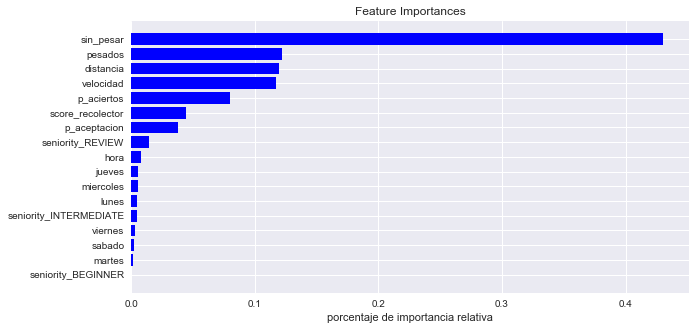

In [356]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (45% aprox)
- pesados (13% aprox)
- distancia (casi 13% aprox)
- velocidad (12% aprox)
- p_aciertos (8% aprox)

### M6 - RandomForestRegressor

In [357]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [358]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_sin_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_sin_imput0.sav', 'wb'))

In [359]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [360]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

NameError: name 'mod_best_rfr_predict' is not defined

#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

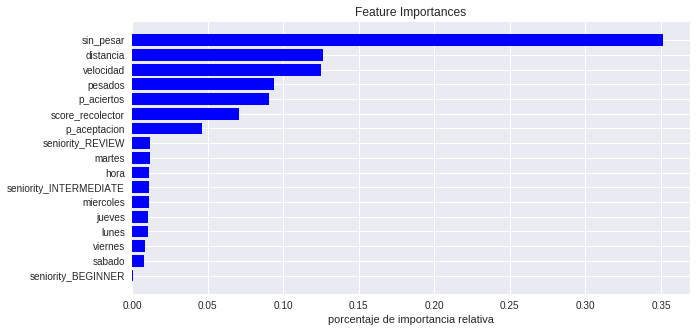

In [342]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (35% aprox)
- distancia (14% aprox)
- velocidad (casi 14% aprox)
- pesados (9,5% aprox)
- p_aciertos (9% aprox)

### M7 - XGBoostRegressor

In [361]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

In [362]:
# Iniciamos modelo
mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [363]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_sin_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_sin_imput0.sav', 'wb'))

In [364]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.7}

In [365]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [366]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 14.741292975617176
RMSE: 19.17277560873584


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB Regressor. Utilizaremos la función 'plot_feature_importance'

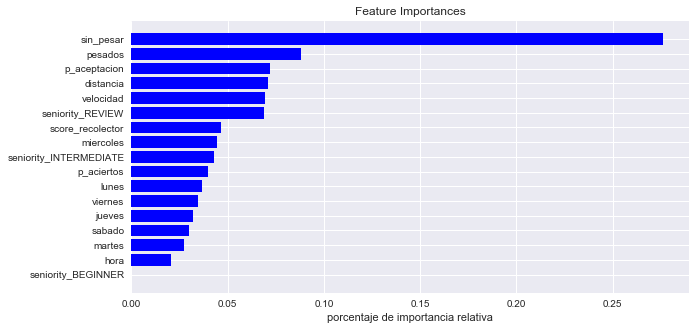

In [367]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (27% aprox)
- pesados (8% aprox)
- velocidad (7% aprox)
- distancia (6% aprox)
- p_aceptacion (casi 5,5% aprox)

### 3.5 - Modelamiento con dataset imputado y atributo solo on_demand = 1

### 3.5.1 - Pre procesamiento previo al modelamiento

Primero seleccionamos solos los registros donde 'id_entrega' sea igual 1

In [369]:
# Creamos copia del df_imput
df_imput_copy = df_imput.copy()
# Creamos nuevo df con solo los registros que tenga on_demand=1
df_imput1 = df_imput_copy.loc[df_imput_copy['on_demand'] == 1]

In [371]:
# eliminamos columna id_entrega
df_imput1.drop(columns=['on_demand'], inplace=True)

# Visualizamos previa del nuevo df
df_imput1.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,91.800861,17.0,10.0,0.8564,1.56,1.00,4.68,0,0,0,1.201478,0,1,0,0,0,0,1
1,206.599732,88.0,15.0,0.8516,1.14,1.00,4.76,0,0,0,1.557546,0,1,0,0,0,0,1
2,93.458001,6.0,0.0,0.8337,2.03,1.00,4.96,0,1,0,2.360018,0,1,0,0,0,0,1
3,124.778761,12.0,5.0,0.8571,2.06,0.92,4.92,0,1,0,1.899097,0,1,0,0,0,0,0
4,130.321208,28.0,16.0,0.8625,1.89,1.00,4.92,0,0,0,0.289042,0,1,0,0,0,0,1


### 3.5.2 - Modelos lineales

### 3.5.2.1 - Matriz de correlación

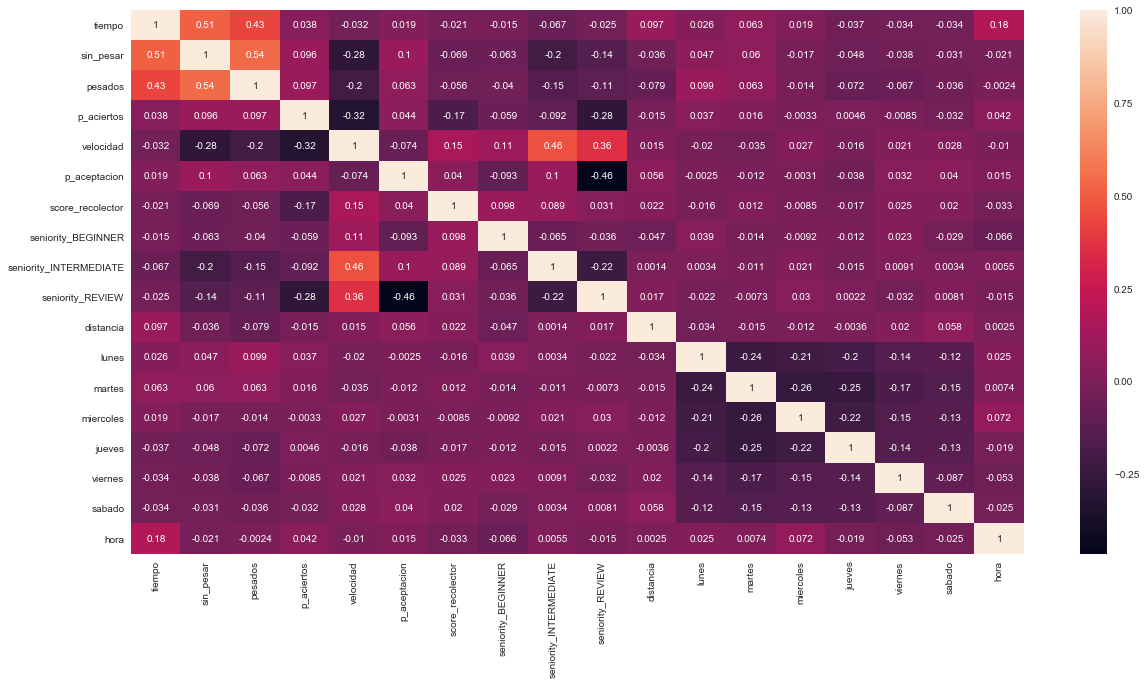

In [372]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_imput1.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.5.2.2 - Normalización de variables

In [373]:
# Se normalizan todos los datos del dataframe.
scaler = StandardScaler()
df_imput1_scaled = pd.DataFrame(scaler.fit_transform(df_imput1), columns = df_imput1.columns)

In [374]:
# Previsualizamos el df normalizado
df_imput1_scaled.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,0.135786,0.118231,0.967673,0.015000,-0.565744,0.558708,-0.797608,-0.102937,-0.635706,-0.353606,-0.482488,-0.439666,1.82761,-0.475703,-0.452338,-0.30874,-0.283063,1.119552
1,2.874023,5.727085,1.852711,-0.117639,-1.321613,0.558708,-0.228443,-0.102937,-0.635706,-0.353606,-0.288294,-0.439666,1.82761,-0.475703,-0.452338,-0.30874,-0.283063,1.119552
2,0.175313,-0.750747,-0.802403,-0.612271,0.280110,0.558708,1.194469,-0.102937,1.573054,-0.353606,0.149360,-0.439666,1.82761,-0.475703,-0.452338,-0.30874,-0.283063,1.119552
3,0.922391,-0.276759,0.082635,0.034343,0.334100,-0.570032,0.909887,-0.102937,1.573054,-0.353606,-0.102018,-0.439666,1.82761,-0.475703,-0.452338,-0.30874,-0.283063,-0.893215
4,1.054592,0.987208,2.029718,0.183562,0.028153,0.558708,0.909887,-0.102937,-0.635706,-0.353606,-0.980114,-0.439666,1.82761,-0.475703,-0.452338,-0.30874,-0.283063,1.119552


### 3.5.2.3 - Conjuntos de entrenamiento y validación (Normalizados)

In [375]:
# Se crean conjuntos de entrenamiento y validación (desde df_imput1 normalizado)
X = df_imput1_scaled.drop(columns='tiempo')
# Generamos vector objetivo (desde df_impu1 sin normalizar)
y = df_imput1['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [376]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (2670, 17)
y_entrenamiento (2670,)
X_validación (1145, 17)
y_validación (1145,)


### 3.5.2.4 - Creación de modelos, refactorización y métricas de desempeño

### M1 - Linear Regression

In [377]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [378]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 23.6084233477389
RMSE: 31.88305094353182


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos. Seleccionamos los 10 atributos con más correlacion y generamos un nuevo LinearRegression

In [379]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_imput1, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.510385,0.510385
pesados,0.428307,0.428307
hora,0.181953,0.181953
distancia,0.097183,0.097183
seniority_INTERMEDIATE,0.067290,-0.067290
martes,0.063391,0.063391
p_aciertos,0.038402,0.038402
jueves,0.037042,-0.037042
sabado,0.034102,-0.034102


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','hora','distancia','seniority_INTERMEDIATE','martes','p_aciertos','jueves','sabado','viernes'**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [380]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X_2 = df_imput1_scaled.loc[:, ['sin_pesar','pesados','hora','distancia','seniority_INTERMEDIATE','martes',
                               'p_aciertos','jueves','sabado','viernes']]
y_2 = df_imput1['tiempo']
# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [381]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (2670, 10)
y_entrenamiento (2670,)
X_validación (1145, 10)
y_validación (1145,)


In [382]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2,y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [383]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 23.9695826132324
RMSE: 32.29446409891373


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### M2 - Ridge con GrisearchCV

In [384]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [385]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [386]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [387]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[16.92452392  9.01319537  0.26812208  4.67151164 -1.47286137  0.68486118
  0.60053542 -0.28106697 -0.16042375  5.51163444  0.2756815   1.7750317
  2.12319161  1.32271528  1.18036062 -0.28137217  8.09796326]
MAE: 23.56008560109777
RMSE: 31.874061199478483


In [388]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,16.924524
1,pesados,9.013195
16,hora,8.097963
9,distancia,5.511634
3,velocidad,4.671512
12,miercoles,2.123192
11,martes,1.775032
4,p_aceptacion,1.472861
13,jueves,1.322715
14,viernes,1.180361


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [389]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [390]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [391]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [392]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[16.08869157  8.75268567  8.11251531  5.50511063  1.38481113  0.77523765
 -1.17028697  0.38366137 -0.94926858  0.4750914 ]
MAE: 23.905108785360866
RMSE: 32.259688064509795


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [393]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,16.088692
1,pesados,8.752686
2,hora,8.112515
3,distancia,5.505111
4,seniority_INTERMEDIATE,1.384811
6,p_aciertos,1.170287
8,sabado,0.949269
5,martes,0.775238
9,viernes,0.475091
7,jueves,0.383661


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge refactorizada.

### M3 - Lasso con Gridsearch

In [394]:
#Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [395]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [396]:
#Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [397]:
#Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[ 1.83933708e+01  9.05093351e+00  3.26531144e-01  5.45868928e+00
 -1.72164318e+00  7.12109039e-01  6.56628225e-01 -3.41835902e-01
 -3.50546750e-01  5.93143104e+00  7.11405116e-01  2.33563721e+00
  2.67444473e+00  1.93082237e+00  1.62839994e+00  1.50038421e-02
  8.71917307e+00]
MAE: 23.60185987815324
RMSE: 31.87694968623445


In [398]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,18.393371
1,pesados,9.050934
16,hora,8.719173
9,distancia,5.931431
3,velocidad,5.458689
12,miercoles,2.674445
11,martes,2.335637
13,jueves,1.930822
4,p_aceptacion,1.721643
14,viernes,1.628400


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [399]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [400]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.02}

In [401]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [402]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[17.38055737  8.80601678  8.75467522  5.92418625  1.73432948  0.79121637
 -1.34547177  0.49590891 -0.97130638  0.54683971]
MAE: 23.964614612934177
RMSE: 32.29149029826612


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

In [403]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,17.380557
1,pesados,8.806017
2,p_aciertos,8.754675
3,velocidad,5.924186
4,p_aceptacion,1.734329
6,seniority_BEGINNER,1.345472
8,seniority_REVIEW,0.971306
5,score_recolector,0.791216
9,distancia,0.546840
7,seniority_INTERMEDIATE,0.495909


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M4 - LinearGAM con Gridsearch

In [404]:
# Creamos grillas con hiperparámetros
search_params = {'lam': np.logspace(-3, 3, 11)}

In [405]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_imput1.sav', 'wb'))

In [406]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [407]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 23.548535547263626
RMSE: 31.842690173901385


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [408]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [409]:
# Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_imput1.sav', 'wb'))

In [410]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [411]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 23.99966165588623
RMSE: 32.310265466134794


Si analizamos las métricas del modelo refactorizado, el error en ambas es más alto que las del modelo anterior.

### 3.5.3 - Modelos de ensamble

### 3.5.3.1 - Conjuntos de entrenamiento y validacion (sin Normalizar)

In [412]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X = df_imput1.drop(columns='tiempo')
y = df_imput1['tiempo']
# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [413]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (2670, 17)
y_entrenamiento (2670,)
X_validación (1145, 17)
y_validación (1145,)


### 3.5.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M5 - AdaBoostRegressor (DecisionTreeRegressor)

In [414]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

In [415]:
# Generamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Generamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [416]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_imput1.sav', 'wb'))

In [417]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 2,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 1000}

In [418]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [419]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 26.734008584644574
RMSE: 34.754014100115775


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo AdaBoost. Utilizaremos la función 'plot_feature_importance'

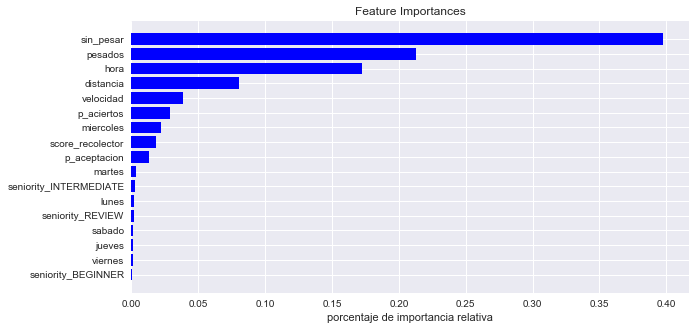

In [420]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (39% aprox)
- pesados (22% aprox)
- hora (17% aprox)
- distancia (8% aprox)
- velocidad (4% aprox)

### M6 - RandomForestRegressor

In [421]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [422]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_imput1.sav', 'wb'))

In [423]:
# Obtenemos los mejores hiperparámetros
mod_rfr_gcv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [424]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [425]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

NameError: name 'mod_best_rfr_predict' is not defined

#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

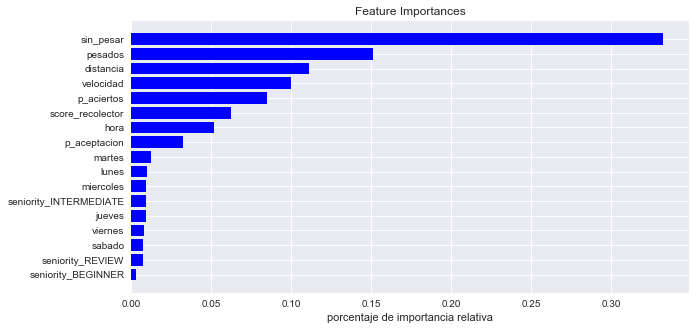

In [427]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (34% aprox)
- pesados (15% aprox)
- distancia (12% aprox)
- velocidad (10% aprox)
- p_aciertos (8% aprox)

### M7 - XGBoost Regressor

In [428]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [429]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_imput1.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_imput1.sav', 'wb'))

In [430]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.7}

In [431]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [432]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 23.600118723689317
RMSE: 31.96055500515181


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB Regressor. Utilizaremos la función 'plot_feature_importance'

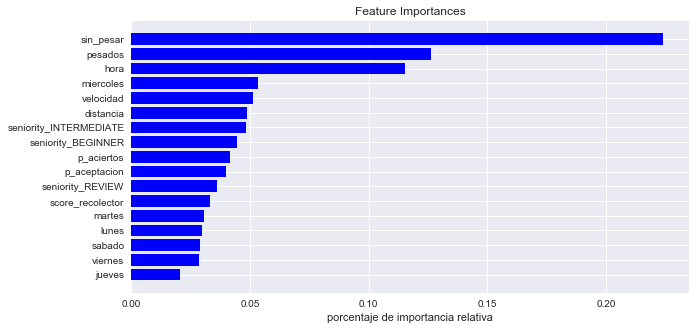

In [433]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (20% aprox)
- pesados (13% aprox)
- hora (12% aprox)
- seniority_INTERMEDIATE (7% aprox)
- distancia (6% aprox)

### 3.6 - Modelamiento con dataset imputado y atributo “on_demand” = 0

### 3.6.1 - Pre procesamiento previo al modelamiento

Primero seleccionamos solos los registros donde 'on_demand' sea igual 0

In [434]:
# Creamos nuevo df_ con solo los registros que tenga id_entrega=1
df_imput0 = df_imput_copy.loc[df_imput_copy['on_demand'] == 0]

In [435]:
# eliminamos columna id_entrega
df_imput0.drop(columns=['on_demand'], inplace=True)

# Visualizamos previa del nuevo df
df_imput0.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
136,113.281087,4.0,3.0,0.8445,2.56,0.84,4.47,0,0,1,1.798251,0,1,0,0,0,0,0
139,84.248618,10.0,1.0,0.8577,1.58,1.00,4.56,0,0,0,2.587815,0,1,0,0,0,0,0
141,156.702988,12.0,0.0,0.8560,2.11,0.96,4.64,0,1,0,3.496377,0,1,0,0,0,0,1
148,114.367828,20.0,5.0,0.9053,1.48,0.96,4.68,0,0,0,0.341157,0,1,0,0,0,0,1
153,100.733187,27.0,1.0,0.8400,2.40,0.96,4.72,0,1,0,1.571134,0,1,0,0,0,0,1


### 3.6.2 - Modelos lineales

### 3.6.2.1 - Matriz de correlación

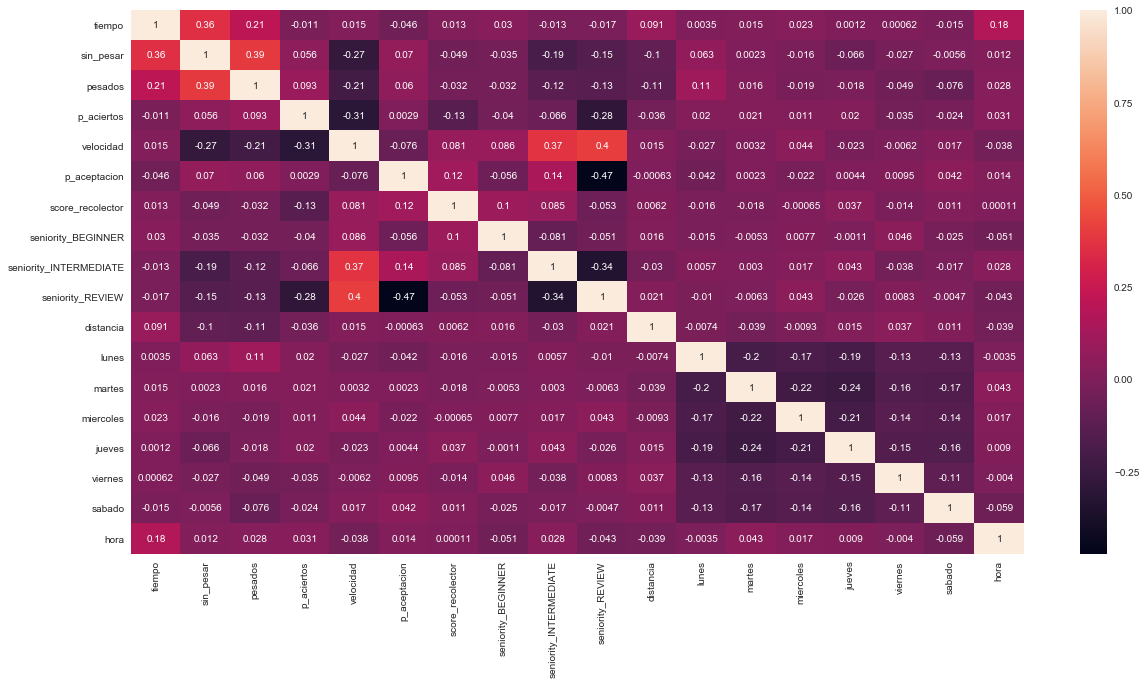

In [436]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
corr = df_imput0.corr() 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Al observar la matriz podemos detectar que no existen correlaciones altas (mayores a 0.5), excepto con los atributos 'sin pesar', 'pesados'. Pero, como estos atrributos son variables explicativas importantes, no se elmiminarán del proceso de modelamiento.

### 3.6.2.2 - Normalización de variables

In [437]:
# Se normalizan/escalan todos los datos del dataframe.
scaler = StandardScaler()
df_imput0_scaled = pd.DataFrame(scaler.fit_transform(df_imput0), columns = df_imput0.columns)

In [438]:
# Previsualizamos el df normalizado
df_imput0_scaled.head()

,tiempo,sin_pesar,pesados,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,distancia,lunes,martes,miercoles,jueves,viernes,sabado,hora
0,1.417203,-0.783824,0.195306,-0.190632,0.914208,-1.627119,-2.267987,-0.110657,-0.735692,2.189048,-0.052025,-0.402293,1.994518,-0.43078,-0.477782,-0.319025,-0.330748,-0.828271
1,0.484096,0.055300,-0.409583,0.167823,-0.717180,0.652475,-1.648799,-0.110657,-0.735692,-0.456820,0.380330,-0.402293,1.994518,-0.43078,-0.477782,-0.319025,-0.330748,-0.828271
2,2.812788,0.335008,-0.712027,0.121659,0.165101,0.082577,-1.098409,-0.110657,1.359264,-0.456820,0.877846,-0.402293,1.994518,-0.43078,-0.477782,-0.319025,-0.330748,1.207335
3,1.452131,1.453841,0.800194,1.460435,-0.883648,0.082577,-0.823215,-0.110657,-0.735692,-0.456820,-0.849910,-0.402293,1.994518,-0.43078,-0.477782,-0.319025,-0.330748,1.207335
4,1.013912,2.432819,-0.409583,-0.312833,0.647859,0.082577,-0.548020,-0.110657,1.359264,-0.456820,-0.176391,-0.402293,1.994518,-0.43078,-0.477782,-0.319025,-0.330748,1.207335


### 3.6.2.3 - Creación de conjuntos de entrenamiento y validación (Normalizados)

In [439]:
# Se crean conjuntos de entrenamiento y validación (desde df normalizado)
X = df_imput0_scaled.drop(columns='tiempo')
# Generamos vector objetivo (desde df sin normalizar)
y = df_imput0['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

### 3.6.2.4 - Creacion de modelos

### M1 - Linear Regression

In [440]:
# Entrenamiento de modelo
mod_lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)
# Predicciones
mod_lreg_predict = mod_lreg.predict(X_test)

In [441]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lreg_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lreg_predict))))

MAE: 20.460800583669723
RMSE: 28.090841822909006


#### Refactorizando LinearRegression

Revisamos correlación entre el vector objetivo y los atributos. Seleccionamos los 10 atributos con más correlacion y generamos un nuevo LinearRegression

In [442]:
# Aplicamos la funcion fetch_features
from func_aux import fetch_features
fetch_features (df_imput0, 'tiempo').head(10)

,abs_corr,corr
attribute,,
sin_pesar,0.356902,0.356902
pesados,0.212769,0.212769
hora,0.176363,0.176363
distancia,0.090921,0.090921
p_aceptacion,0.045528,-0.045528
seniority_BEGINNER,0.030182,0.030182
miercoles,0.023448,0.023448
seniority_REVIEW,0.017030,-0.017030
sabado,0.015313,-0.015313


Si observamos la tabla de correlacion, los 10 atributos más correlacionados con nuestro vector objetivo son **'sin_pesar','pesados','hora','distancia','p_aceptacion','seniority_BEGINNER','miercoles','seniority_REVIEW', 'sabado', 'velocidad'**.

Con estos atributos generaremos un modelo depurado. Lo que se busca es poder mejorar las métricas de desempeño.

*Nota: Estos atributos seran utilizados en las refactorizaciones de los modelos Ridge, Lasso y Linear GAM.*

In [443]:
# Creamos nuevos conjuntos de entrenamiento y validacion
X_2 = df_imput0_scaled.loc[:, ['sin_pesar','pesados','hora','distancia','p_aceptacion','seniority_BEGINNER',
                               'miercoles','seniority_REVIEW', 'sabado', 'velocidad']]
y_2 = df_imput0['tiempo']
# Generamos segmentaciones del 33% y se incluye semilla seudo aleatoria
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3, random_state=rs)

In [444]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train2.shape)
print ("y_entrenamiento", y_train2.shape)
print ("X_validación", X_test2.shape)
print ("y_validación", y_test2.shape)

X_entrenamiento (1909, 10)
y_entrenamiento (1909,)
X_validación (819, 10)
y_validación (819,)


In [445]:
# Entrenamiento de modelo
mod_lreg2 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train2,y_train2)
# Predicciones
mod_lreg2_predict = mod_lreg2.predict(X_test2)

In [446]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lreg2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lreg2_predict))))

MAE: 20.578657056077258
RMSE: 28.151210461421368


### M2 - Ridge con GridsearchCV

In [447]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge_gcv = GridSearchCV(mod_ridge, param_grid=ridge_params, cv=10).fit(X_train, y_train)

In [448]:
# Obtenemos los mejores hiperparámetros
mod_ridge_gcv.best_params_

{'alpha': 200}

In [449]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge = mod_ridge_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ridge_predict = mod_best_ridge.predict(X_test)

In [450]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ridge_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ridge_predict))))

Coeficientes finales: 
[ 1.03272910e+01  3.16710271e+00 -5.22952866e-03  3.17344765e+00
 -2.22172119e+00  6.96166148e-01  1.79585357e+00  9.24613408e-01
 -7.19931877e-01  4.12343303e+00  1.83358112e-01  1.35444937e+00
  1.45835753e+00  1.33625482e+00  1.20345199e+00  9.20731072e-01
  4.89640636e+00]
MAE: 20.445212854741975
RMSE: 28.128163541330053


In [451]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge = list(abs(mod_best_ridge.coef_))
# Generamos una lista con las columnas
col = list(X_train.columns)
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_ridge)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,10.327291
16,hora,4.896406
9,distancia,4.123433
3,velocidad,3.173448
1,pesados,3.167103
4,p_aceptacion,2.221721
6,seniority_BEGINNER,1.795854
12,miercoles,1.458358
11,martes,1.354449
13,jueves,1.336255


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge.

#### Refactorización Ridge

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [452]:
# Generamos conjunto de hiperparametros
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
# Generamos modelo
mod_ridge2 = Ridge(random_state=rs)
# Aplicamos grilla de hiperparámetros y entrenamos el modelo
mod_ridge2_gcv = GridSearchCV(mod_ridge2, param_grid=ridge_params, cv=10).fit(X_train2, y_train2)

In [453]:
# Obtenemos los mejores hiperparámetros
mod_ridge2_gcv.best_params_

{'alpha': 200}

In [454]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ridge2 = mod_ridge2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_ridge2_predict = mod_best_ridge2.predict(X_test2)

In [455]:
# Parámetros, coeficientes finales y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_ridge2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_ridge2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_ridge2_predict))))

Coeficientes finales: 
[10.12718265  3.05865132  4.96742357  4.14126042 -2.18073731  1.74795039
  0.68412083 -1.23876305  0.25049367  3.70118675]
MAE: 20.547898038987015
RMSE: 28.181222196639848


In [456]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_ridge2 = list(abs(mod_best_ridge2.coef_))
# Generamos una lista con las columnas
col2 = X_train2.columns
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col2, coef_ridge2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,10.127183
2,hora,4.967424
3,distancia,4.141260
9,velocidad,3.701187
1,pesados,3.058651
4,p_aceptacion,2.180737
5,seniority_BEGINNER,1.747950
7,seniority_REVIEW,1.238763
6,miercoles,0.684121
8,sabado,0.250494


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Ridge refactorizada.

### M3 - Lasso con GridsearchCV

In [457]:
#Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso_gcv = GridSearchCV(mod_lasso, param_grid=lasso_params).fit(X_train, y_train)

In [458]:
# Obtenemos los mejores hiperparámetros
mod_lasso_gcv.best_params_

{'alpha': 0.03}

In [459]:
#Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso = mod_lasso_gcv.best_estimator_.fit(X_train, y_train)
mod_best_lasso_predict = mod_best_lasso.predict(X_test)

In [460]:
#Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_lasso_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_lasso_predict))))

Coeficientes finales: 
[11.6588291   3.13688597  0.02659545  3.97516271 -2.6085966   0.73852742
  1.87578625  0.82241043 -1.10621653  4.65876951  0.64930608  2.06074509
  2.12984895  2.09704906  1.7466187   1.44334034  5.40611952]
MAE: 20.44967168548338
RMSE: 28.085343663338655


In [461]:
# Generamos una lista con los coeficientes calculados por Ridge
coef_lasso = list(abs(mod_best_lasso.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef = pd.DataFrame(list(zip(col, coef_lasso)), columns =['Atributos', 'Coef']) 
df_coef.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,11.658829
16,hora,5.406120
9,distancia,4.658770
3,velocidad,3.975163
1,pesados,3.136886
4,p_aceptacion,2.608597
12,miercoles,2.129849
13,jueves,2.097049
11,martes,2.060745
6,seniority_BEGINNER,1.875786


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso.

#### Refactorización Lasso

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [462]:
# Generamos grupo de hiperparámetros
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# Generamos modelo
mod_lasso2 = Lasso(random_state=rs)
# Aplicamos grilla de hiperparametros y entrenamos
mod_lasso2_gcv = GridSearchCV(mod_lasso2, param_grid=lasso_params).fit(X_train2, y_train2)

In [463]:
# Obtenemos los mejores hiperparámetros
mod_lasso2_gcv.best_params_

{'alpha': 0.03}

In [464]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_lasso2 = mod_lasso2_gcv.best_estimator_.fit(X_train2, y_train2)
mod_best_lasso2_predict = mod_best_lasso2.predict(X_test2)

In [465]:
# Calculo de parametros, coeficientes y métricas de desempeño
print('Coeficientes finales: \n{0}'.format(mod_best_lasso2.coef_))
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_best_lasso2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_best_lasso2_predict))))

Coeficientes finales: 
[11.41542012  3.02999359  5.49224591  4.69437109 -2.59739591  1.83502877
  0.72470247 -1.68647773  0.255683    4.54043294]
MAE: 20.571246086152073
RMSE: 28.14866246492923


In [466]:
# Generamos una lista con los coeficientes calculados por RidgeCV
coef_lasso2 = list(abs(mod_best_lasso2.coef_))
# Creamos un nuevo df con los atributos y coeficientes respectivos
df_coef2 = pd.DataFrame(list(zip(col, coef_lasso2)), columns =['Atributos', 'Coef']) 
df_coef2.sort_values(by='Coef',ascending=False)

,Atributos,Coef
0,sin_pesar,11.415420
2,p_aciertos,5.492246
3,velocidad,4.694371
9,distancia,4.540433
1,pesados,3.029994
4,p_aceptacion,2.597396
5,score_recolector,1.835029
7,seniority_INTERMEDIATE,1.686478
6,seniority_BEGINNER,0.724702
8,seniority_REVIEW,0.255683


En la tabla podemos observar los atributos con un mayor coeficiente en nuestra regresión lineal Lasso refactorizada.

### M4 - LinearGAM con Gridsearch

In [467]:
# Creamos grillas con hiperparámetros
search_params = {'lam': np.logspace(-3, 3, 11)}

In [468]:
# Primero buscamos el archivo pickle
try:
    mod_lgam = pickle.load(open('serial/mod_lgam_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam = LinearGAM().gridsearch(X_train.values, y_train.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam, open('serial/mod_lgam_imput0.sav', 'wb'))

In [469]:
# Predicciones
mod_lgam_predict = mod_lgam.predict(X_test)

In [470]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_lgam_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_lgam_predict))))

MAE: 20.394971751677062
RMSE: 28.03134620536657


#### Refactorización LinearGAM

Utilizamos solos los 10 atributos seleccionados en la refactorizacion en LinearRegression

In [471]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [472]:
# Primero buscamos el archivo pickle
try:
    mod_lgam2 = pickle.load(open('serial/mod_lgam2_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle
except:
    mod_lgam2 = LinearGAM().gridsearch(X_train2.values, y_train2.values, **search_params)
    # Pickling del modelo
    pickle.dump(mod_lgam2, open('serial/mod_lgam2_imput0.sav', 'wb'))

In [473]:
# Predicciones
mod_lgam2_predict = mod_lgam2.predict(X_test2)

In [474]:
# Métricas de desempeño
print('MAE: {0}'.format(mean_absolute_error(y_test2, mod_lgam2_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test2, mod_lgam2_predict))))

MAE: 20.50699019507834
RMSE: 28.086475563215398


### 3.6.3 - Modelos de ensamble

### 3.6.3.1 - Creación de conjuntos de entrenamiento y validación (sin normalizar)

In [475]:
#Se crean conjuntos de entrenamiento y validación (desde df normalizado)
X = df_imput0.drop(columns='tiempo')
# Generamos vector objetivo (desde df sin normalizar)
y = df_imput0['tiempo']
#Separamos los subsets de entrenamiento (train) y validación (test)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [476]:
# Dimensiones conjuntos
print ("X_entrenamiento", X_train.shape)
print ("y_entrenamiento", y_train.shape)
print ("X_validación", X_test.shape)
print ("y_validación", y_test.shape)

X_entrenamiento (1909, 17)
y_entrenamiento (1909,)
X_validación (819, 17)
y_validación (819,)


### 3.6.3.2 - Creación de modelos, métricas de desempeño e importancia de atributos

### M5 - AdaBoostRegressor (DecisionTreeRegressor)

In [477]:
# Creamos grilla con hiperparámetros
param_grid = {'base_estimator__max_features'     : ['sqrt'],
              'base_estimator__splitter'         : ['best', 'random'],
              'base_estimator__min_samples_split': [2, 4],
              'base_estimator__max_depth'        : [1, 3],
              'n_estimators'                     : [50, 100, 1000],
              'learning_rate'                    : [.001, .01, .1],
              'loss'                             : ['linear', 'square', 'exponential']
             }

In [478]:
# Generamos nuestro modelo DCT 
mod_dtc = DecisionTreeRegressor(random_state = rs)
# Generamos nuestro modelo de ensamble
mod_ada = AdaBoostRegressor(base_estimator = mod_dtc, random_state=rs)

In [479]:
# Primero buscamos el archivo pickle
try:
    mod_ada_gcv = pickle.load(open('serial/mod_ada_gcv_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_ada_gcv = GridSearchCV(mod_ada, param_grid=param_grid, cv=2).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_ada_gcv, open('serial/mod_ada_gcv_imput0.sav', 'wb'))

In [480]:
# Obtenemos los mejores hiperparámetros
mod_ada_gcv.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_split': 4,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.01,
 'loss': 'linear',
 'n_estimators': 100}

In [481]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_ada = mod_ada_gcv.best_estimator_.fit(X_train, y_train)
mod_best_ada_predict = mod_best_ada.predict(X_test)

In [482]:
# Métricas de desempeño AdaBoostRegressor
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_ada_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_ada_predict))))

MAE: 21.874707437736845
RMSE: 29.334949809975328


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo AdaBoost. Utilizaremos la función 'plot_feature_importance'

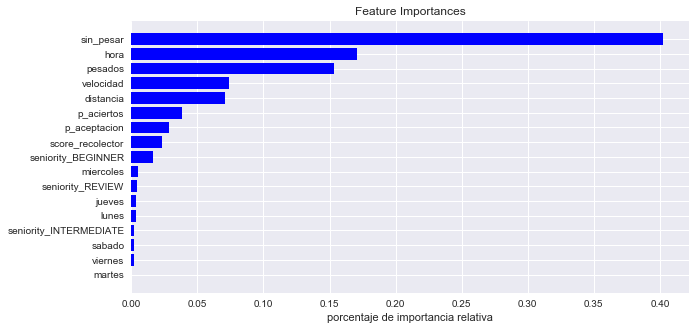

In [483]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_ada, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (40,5% aprox)
- hora (17% aprox)
- pesados (casi 15% aprox)
- velocidad (7,5% aprox)
- distancia (7% aprox)

### M6 - RandomForestRegressor

In [484]:
# Creamos grilla con hiperparametros
param_grid = {"n_estimators"      : [10,20,30],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False],
             }

# Generamos nuestro modelo
mod_rfr = RandomForestRegressor(random_state=rs)

In [485]:
# Primero buscamos el archivo pickle
try:
    mod_rfr_gcv = pickle.load(open('serial/mod_rfr_gcv_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_rfr_gcv = GridSearchCV(mod_rfr, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_rfr_gcv, open('serial/mod_rfr_gcv_imput0.sav', 'wb'))

In [486]:
# Obtenemos los mejores hiperparámetros
mod_rfr_gcv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [487]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_rfr = mod_rfr_gcv.best_estimator_.fit(X_train, y_train)
mod_best_rfr_predict = mod_best_rfr.predict(X_test)

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [488]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_rfr_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_rfr_predict))))

NameError: name 'mod_best_rfr_predict' is not defined

#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo Random Forest. Utilizaremos la función 'plot_feature_importance'

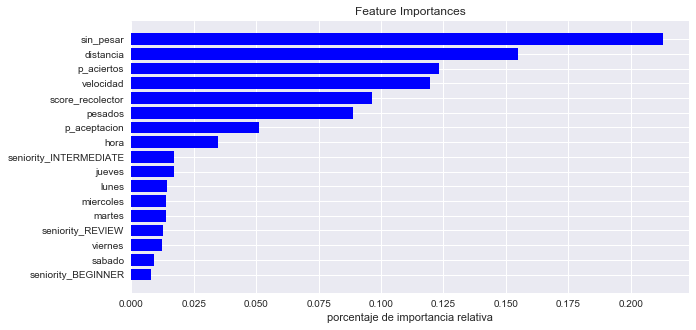

In [489]:
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_rfr, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (22% aprox)
- distancia (16% aprox)
- p_aciertos (casi 12,5% aprox)
- velocidad (12% aprox)
- score_recolector (casi 9% aprox)

### M7 - XGBoostRegressor

In [490]:
# Creamos grilla con hiperparametros
param_grid = {'min_child_weight':[4,5], 
              'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 
              'max_depth': [2,3,4]}

# Iniciamos modelo
mod_xgb = XGBRegressor(nthread=-1, silent = True, random_state=rs)

In [491]:
# Primero buscamos el archivo pickle
try:
    mod_xgb_gcv = pickle.load(open('serial/mod_xgb_gcv_imput0.sav','rb'))

# Si no esta el archivo, iniciamos la grilla, entrenamos y generamos el archivo pickle (Ojo!, toma tiempo)
except:
    mod_xgb_gcv = GridSearchCV(mod_xgb, param_grid=param_grid, cv=5).fit(X_train,y_train)
    # Pickling del modelo
    pickle.dump(mod_xgb_gcv, open('serial/mod_xgb_gcv_imput0.sav', 'wb'))

In [492]:
# Obtenemos los mejores hiperparámetros
mod_xgb_gcv.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 2,
 'min_child_weight': 4,
 'subsample': 0.6}

In [493]:
# Entrenamos nuevamente con los mejores hiperparámetros
mod_best_xgb = mod_xgb_gcv.best_estimator_.fit(X_train, y_train)
mod_best_xgb_predict = mod_best_xgb.predict(X_test)

In [494]:
# Métricas de desempeño RandomForest
print('MAE: {0}'.format(mean_absolute_error(y_test, mod_best_xgb_predict)))
print('RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, mod_best_xgb_predict))))

MAE: 20.385964329526946
RMSE: 28.0492634618592


#### Importancia de atributos

Analizaremos la importancia relativa de cada atributo en nuestro modelo XGB Regressor. Utilizaremos la función 'plot_feature_importance'

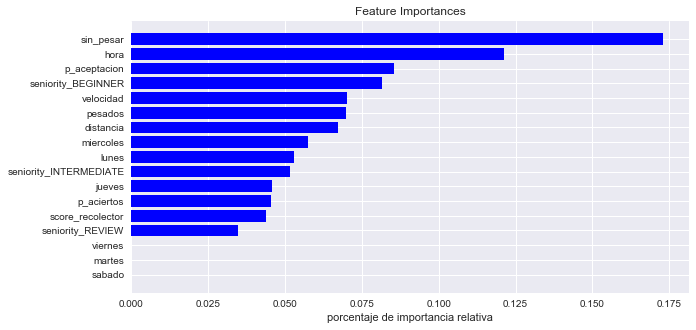

In [495]:
# Aplicamos función feature_importance
from func_aux import plot_feature_importance
list_names = X_train.columns
plot_feature_importance(mod_best_xgb, list_names)

Los 5 atributos que más influyen en nuestra prediccion son: 
- sin_pesar (17% aprox)
- hora (11,5% aprox)
- pesados (9% aprox)
- miércoles (8,5% aprox)
- velocidad (7% aprox)